In [1]:
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#at least 2 to become alive, when three, new life starts
def step(X):
    l = []
    for i in (-1, 0, 1):
        for j in (-1, 0, 1):
            if i != 0 or j != 0:
                l.append(np.roll(np.roll(X, i, 0), j, 1))
    nbrs_count = sum(l)
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def step_animation(X, dpi=300):

    X = np.asarray(X)
    X = X.astype(bool)

    X_blank = np.zeros_like(X)
    fig, ax = plt.subplots()
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.X)
        animate.X = step(animate.X)
        return (im,)
    animate.X = X
  
    # set up animation
    anim = animation.FuncAnimation(fig, animate, interval=100, frames=100,
                              save_count=50)
    return display_animation(anim, default_mode='loop')


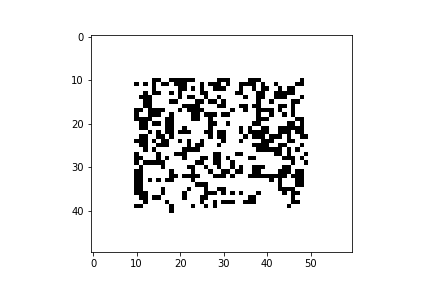
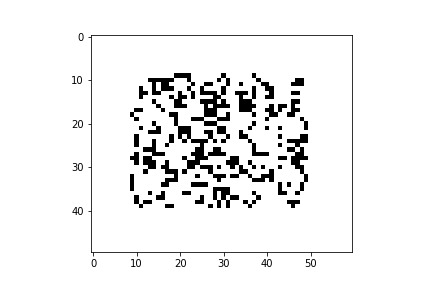
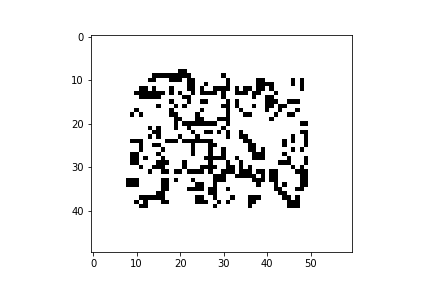
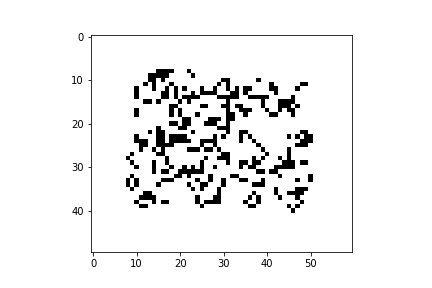
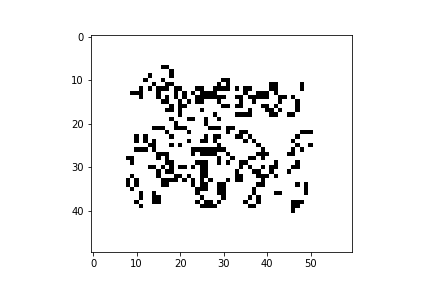
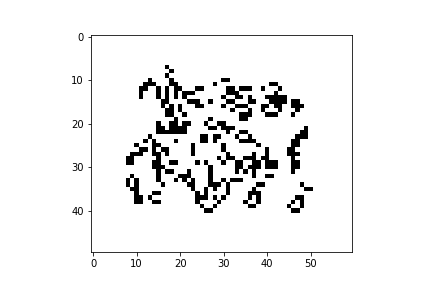
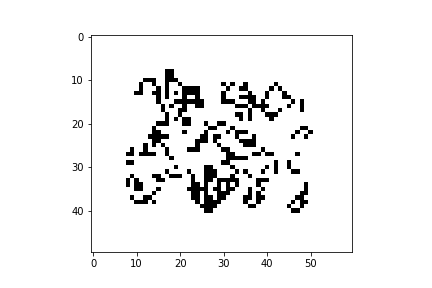
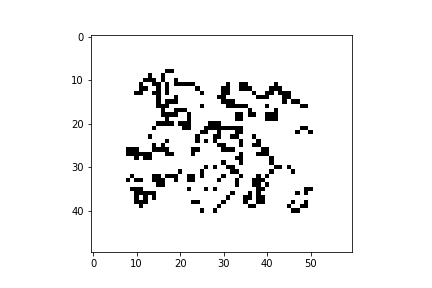
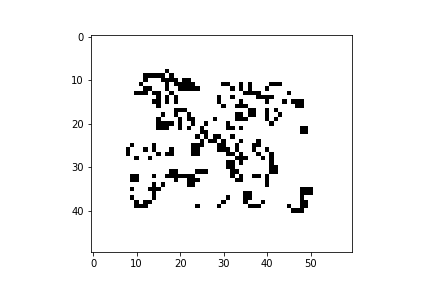
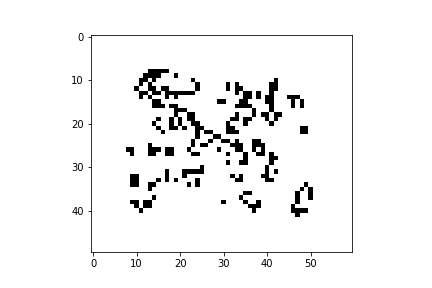
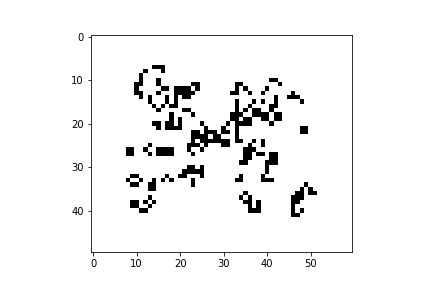
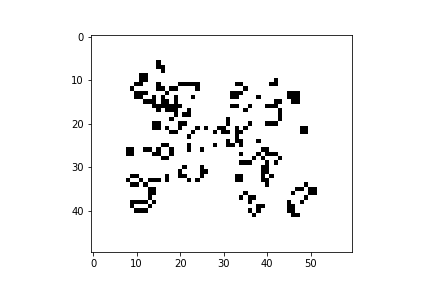
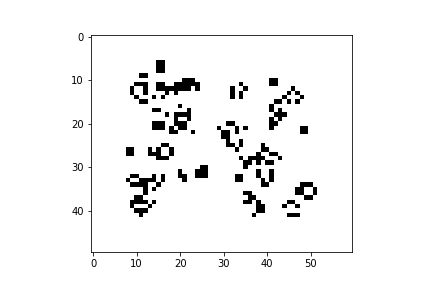
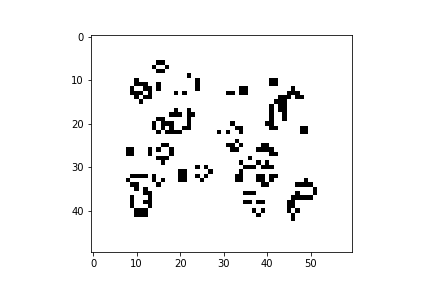
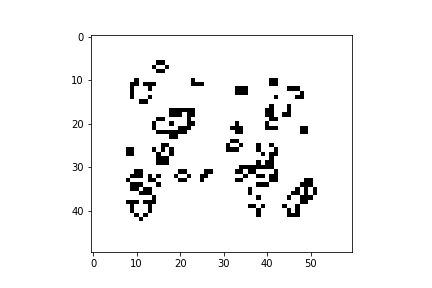
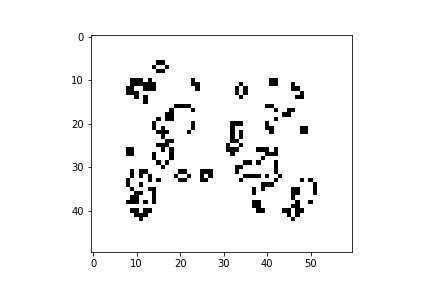
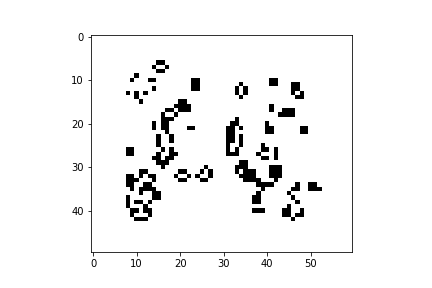
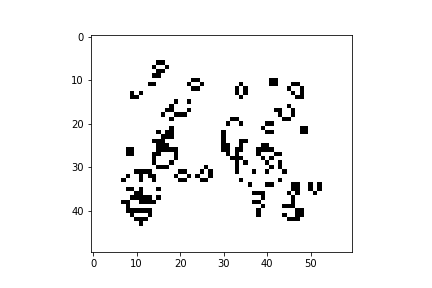
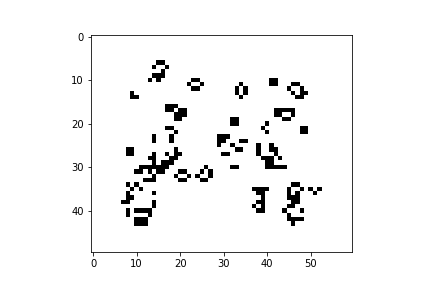
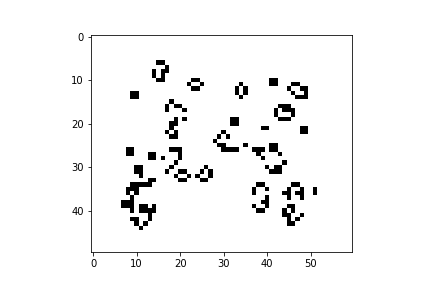
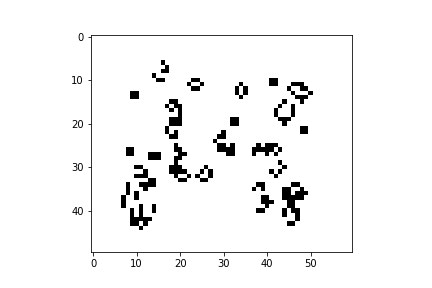
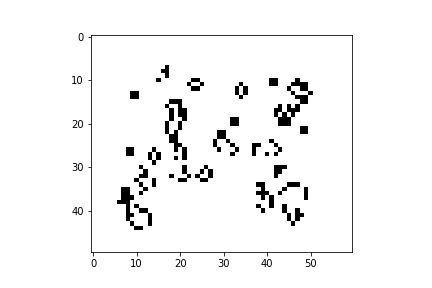
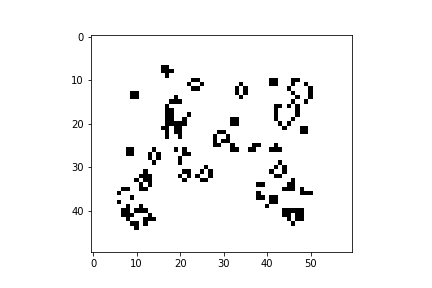
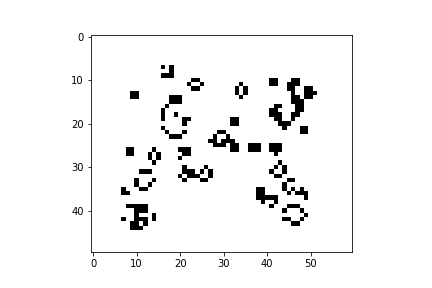
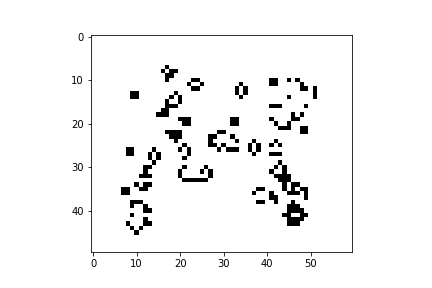
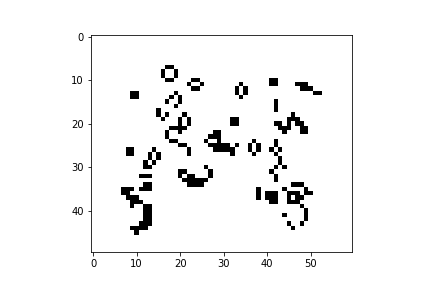
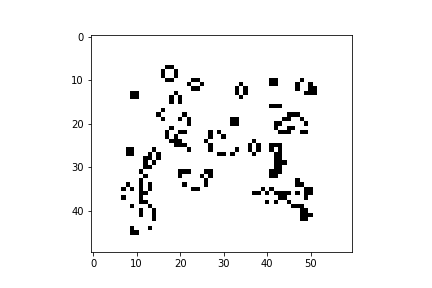
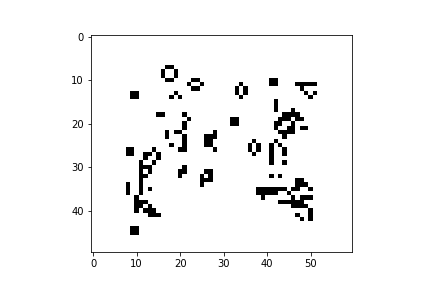
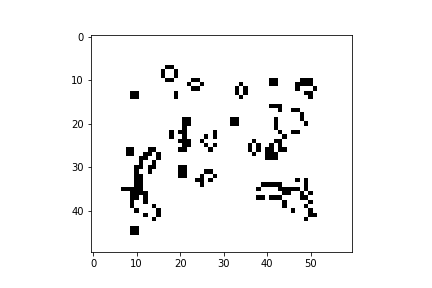
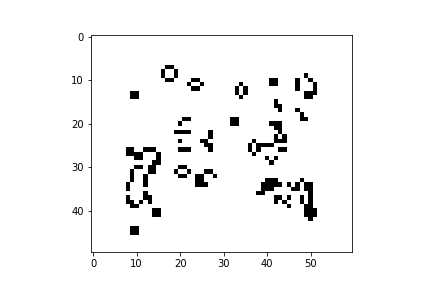
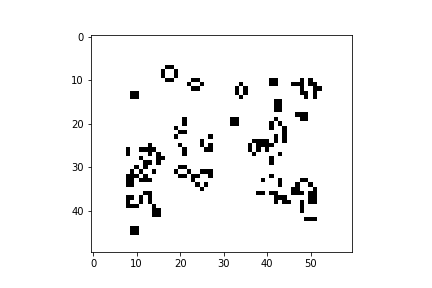
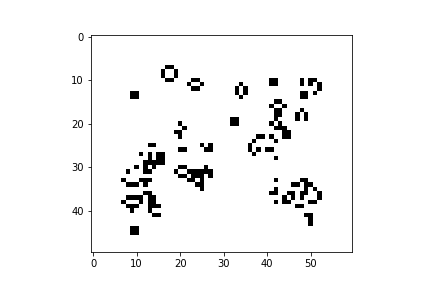
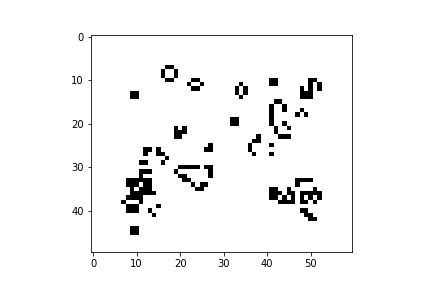
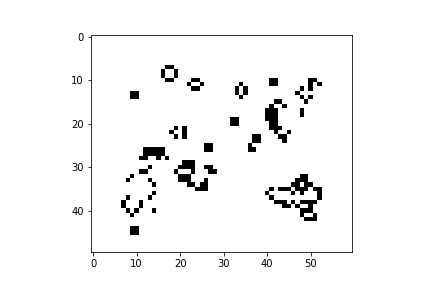
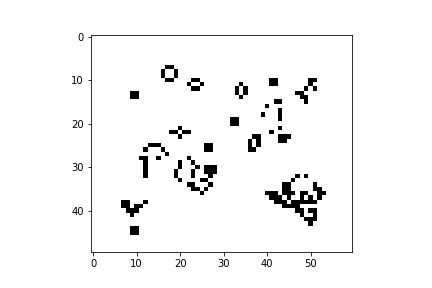
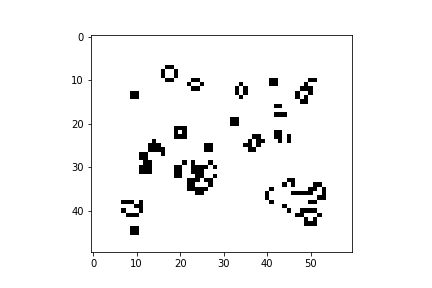
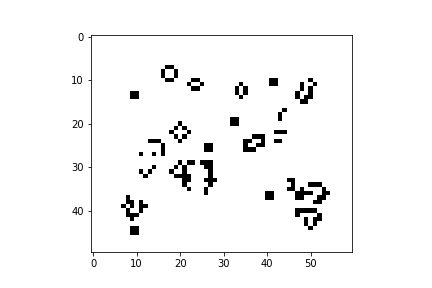
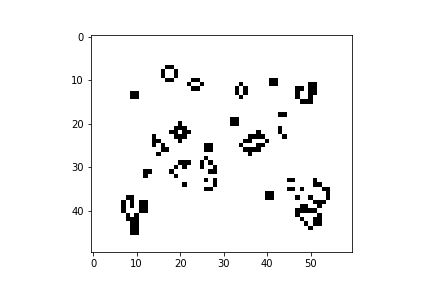
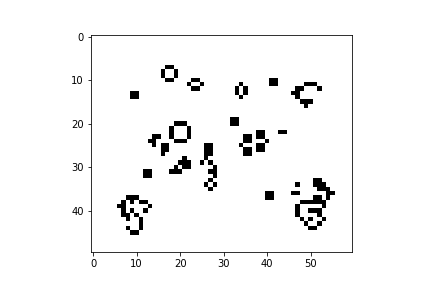
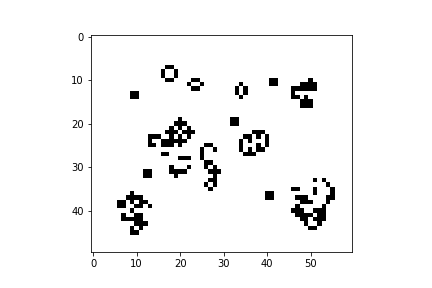
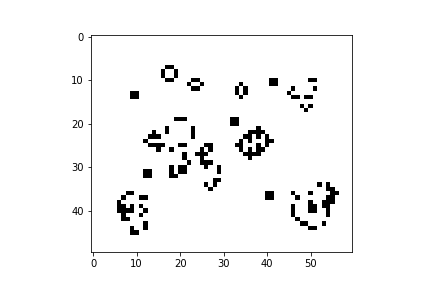
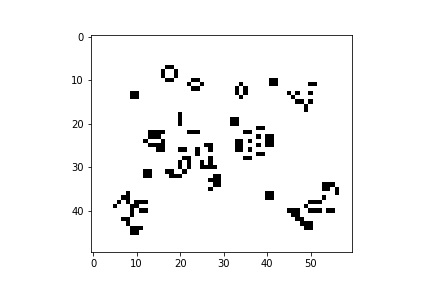
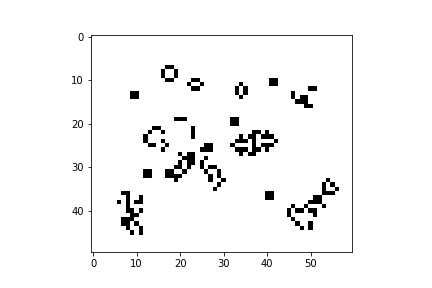
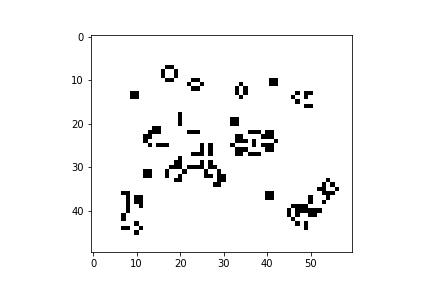
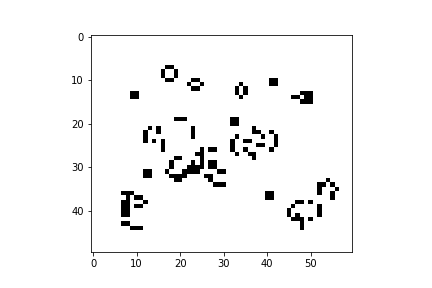
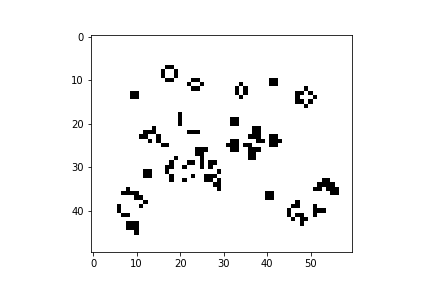
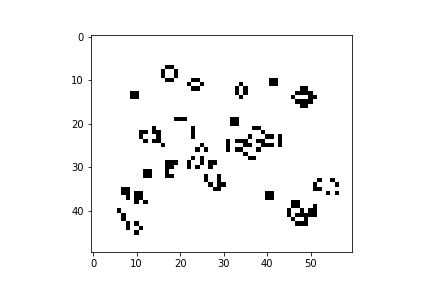
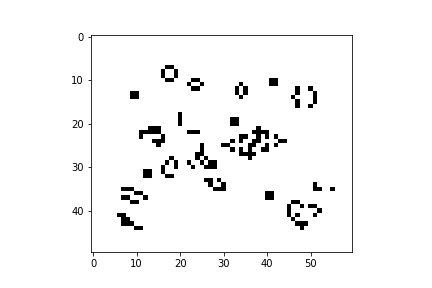
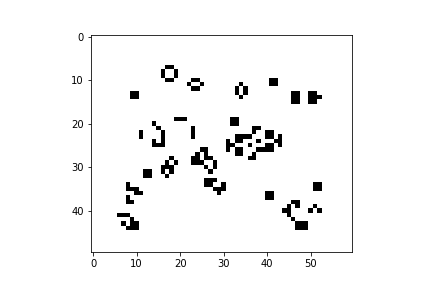
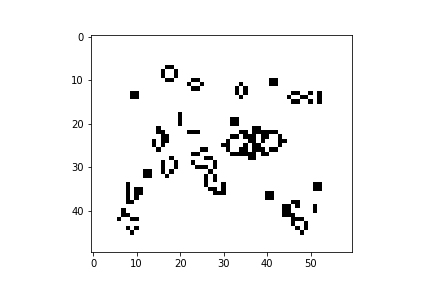
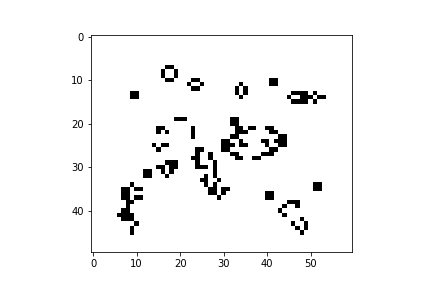
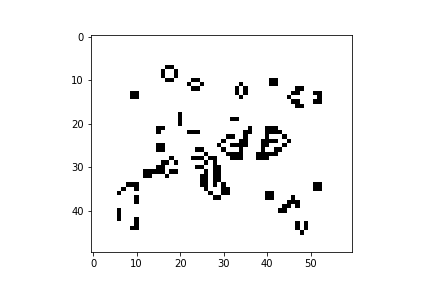
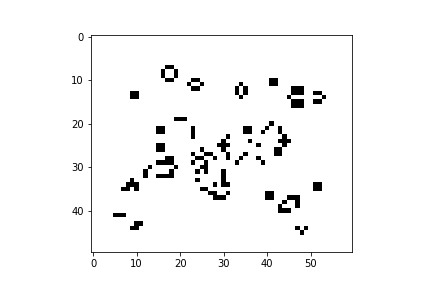
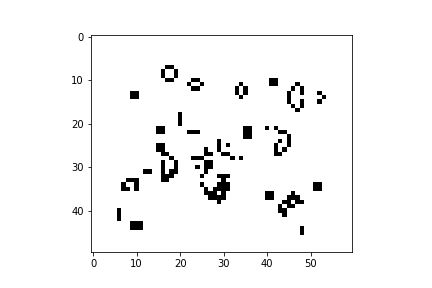
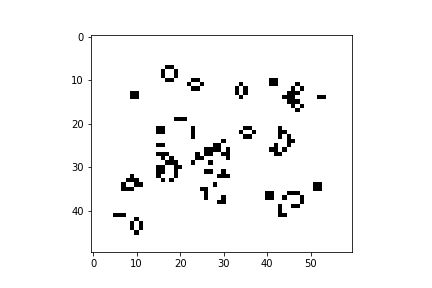
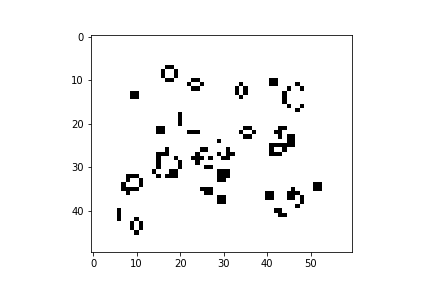
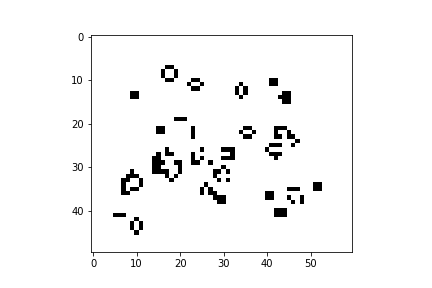
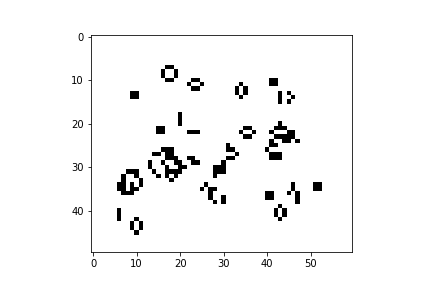
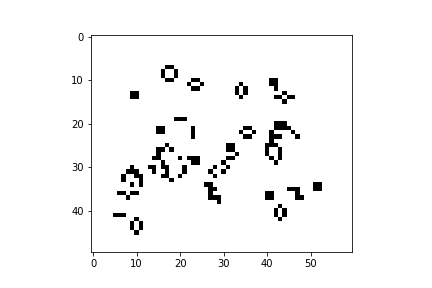
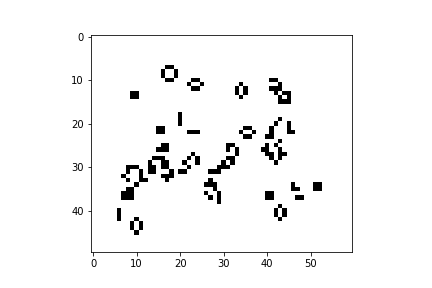
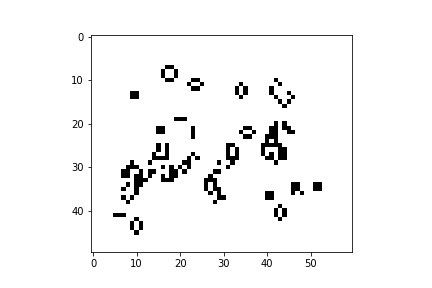
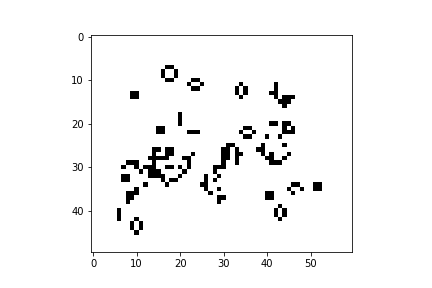
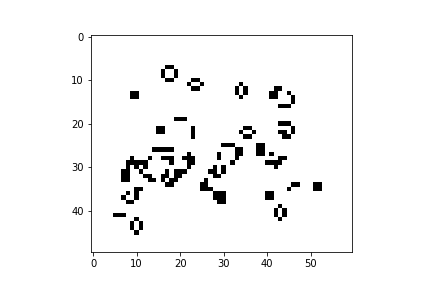
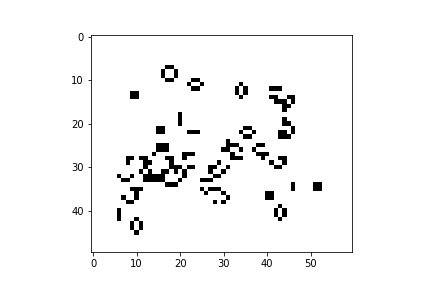
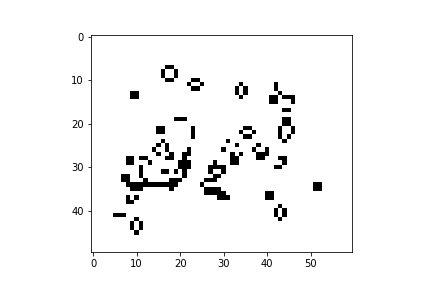
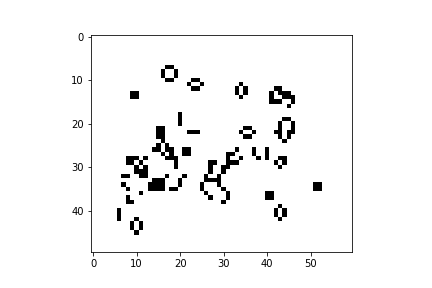
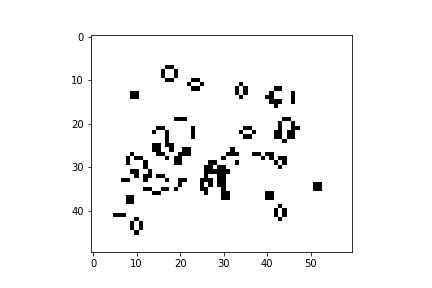
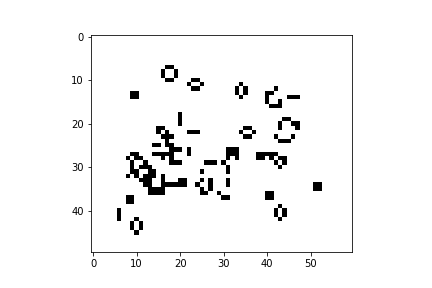
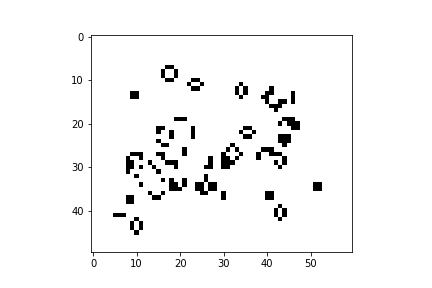
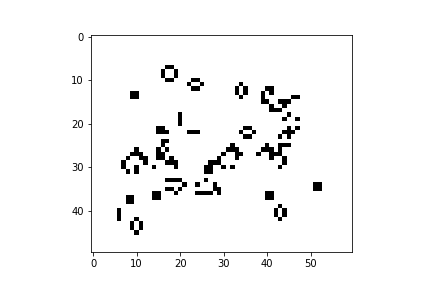
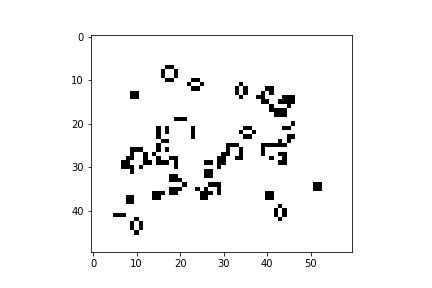
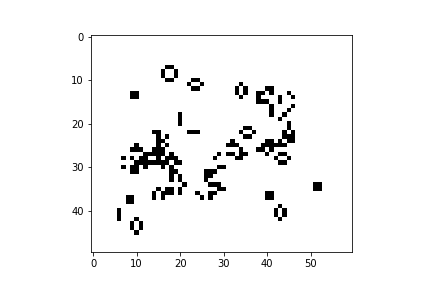
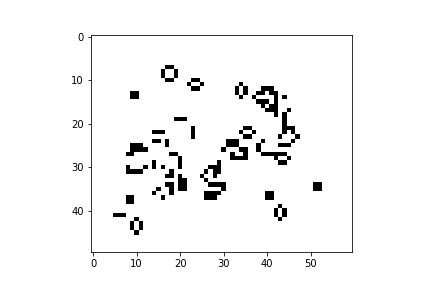
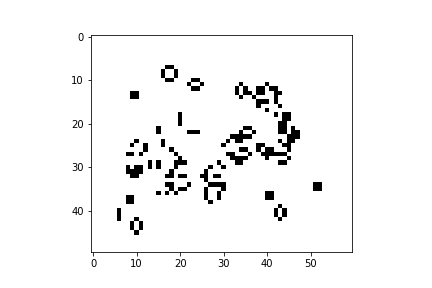
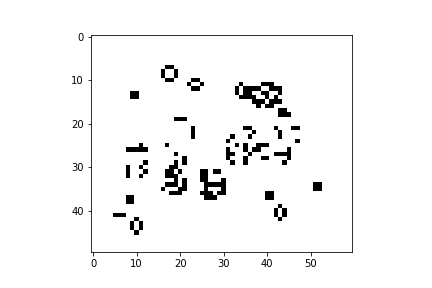
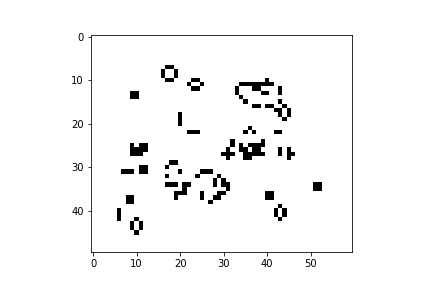
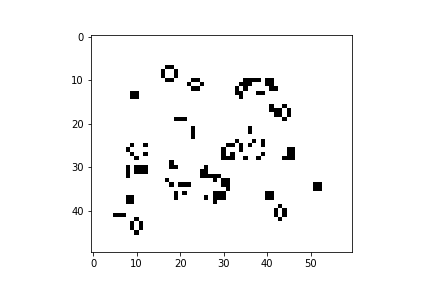
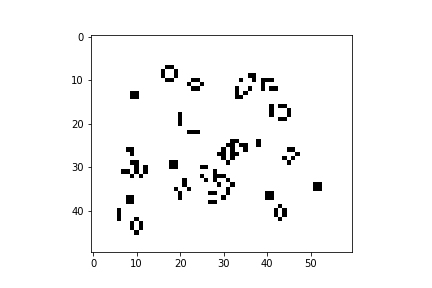
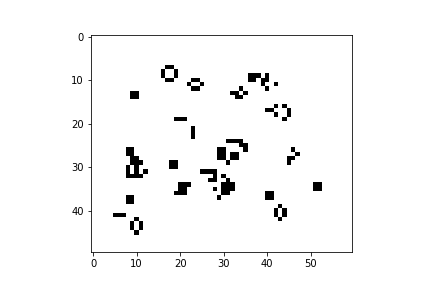
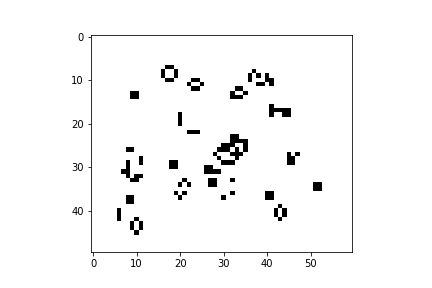
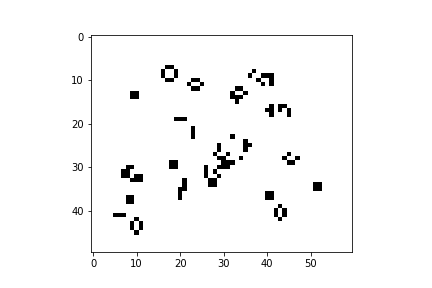
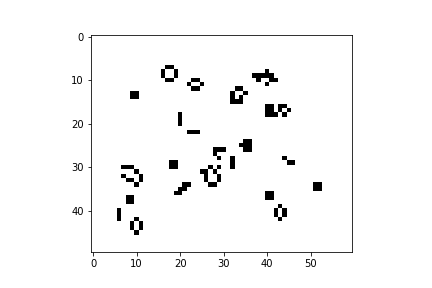
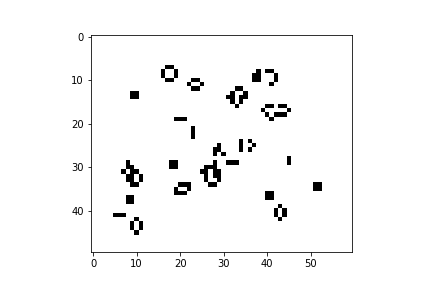
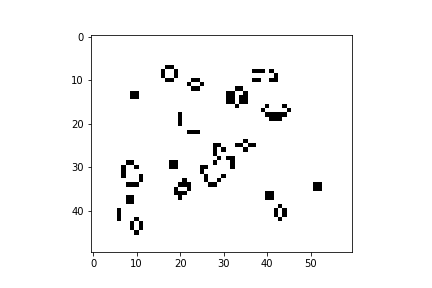
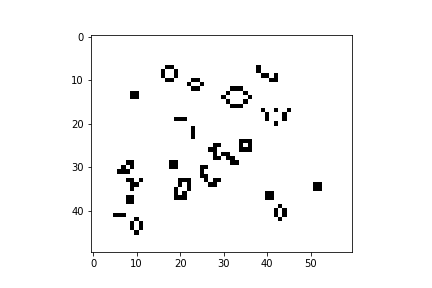
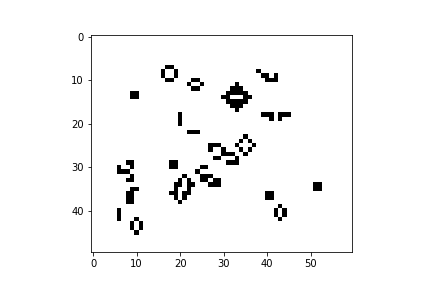
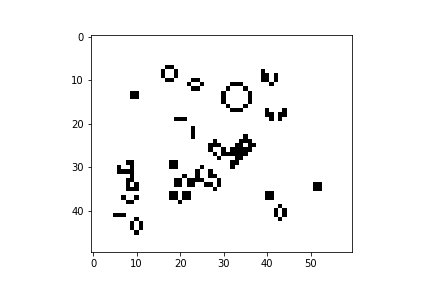
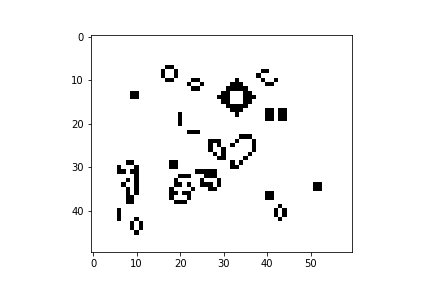
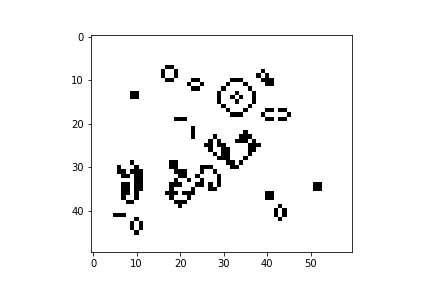
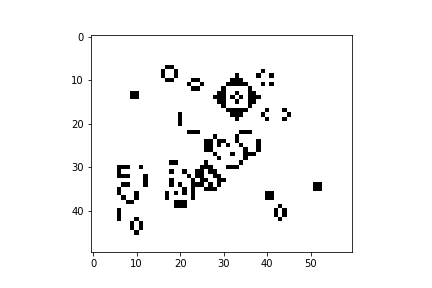
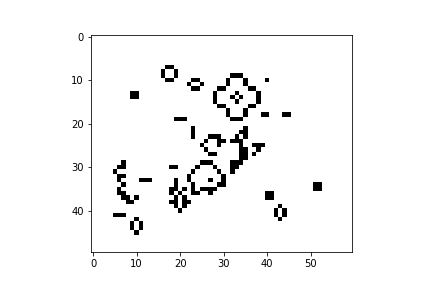
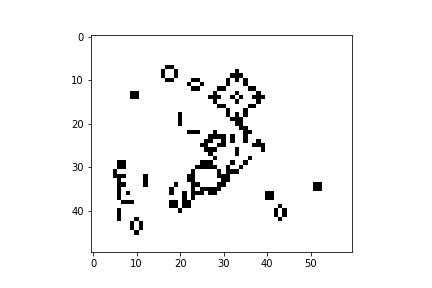
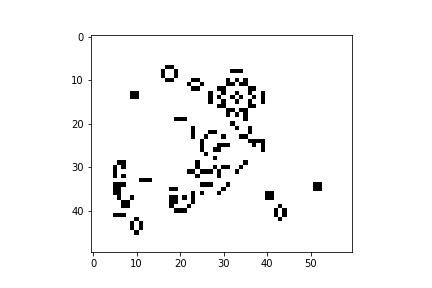
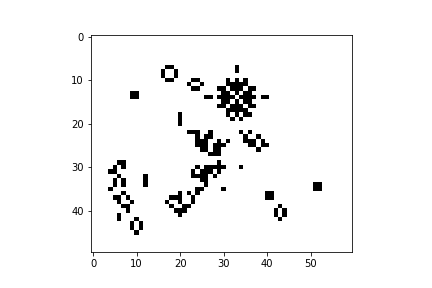
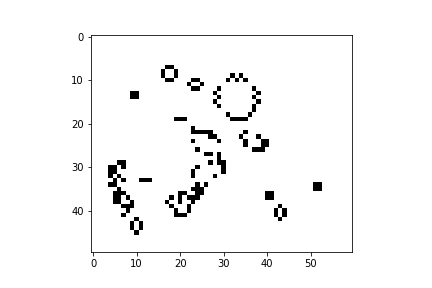
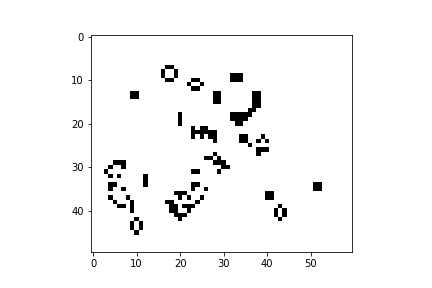
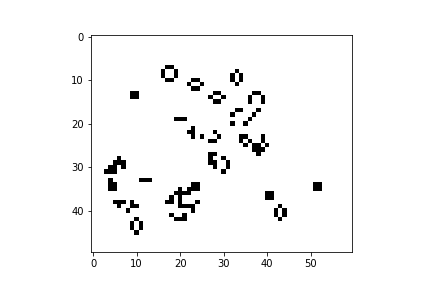
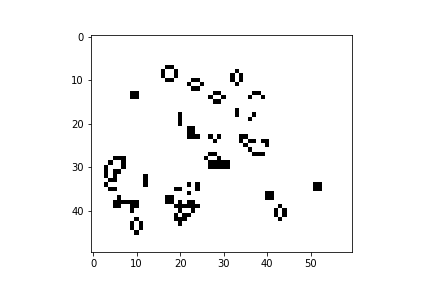
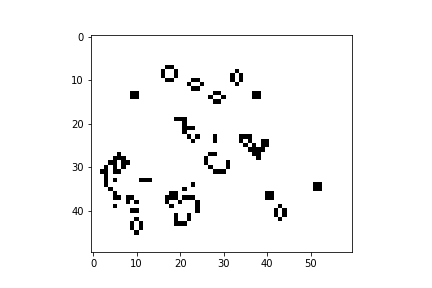
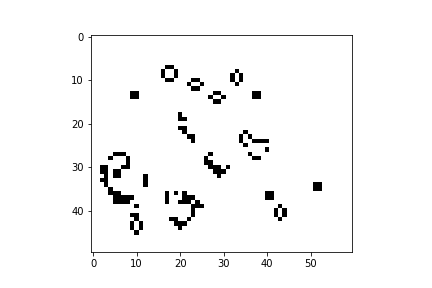

In [2]:
X = np.zeros((50, 60), dtype=bool)
r1 = np.random.random((10, 20))
r2 = np.random.random((30, 40))
#row range, col range
X[10:20, 30:50] = (r1 > 0.75)
X[10:40, 10:50] = (r2 > 0.65)
step_animation(X, dpi=10)


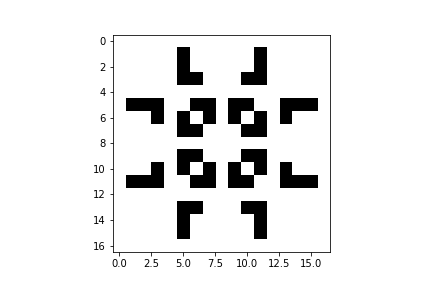
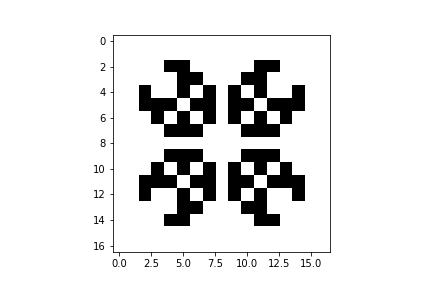
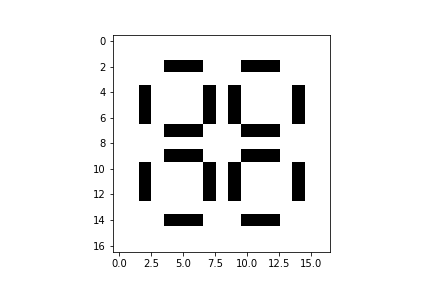
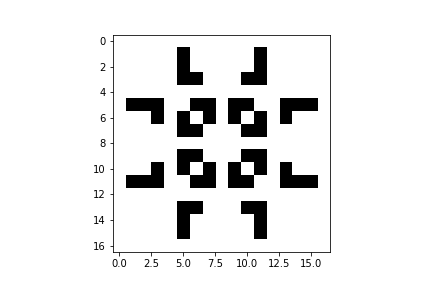
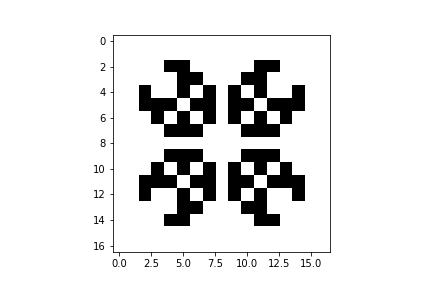
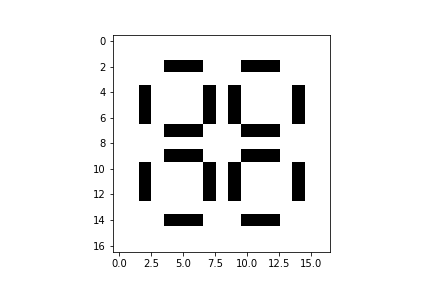
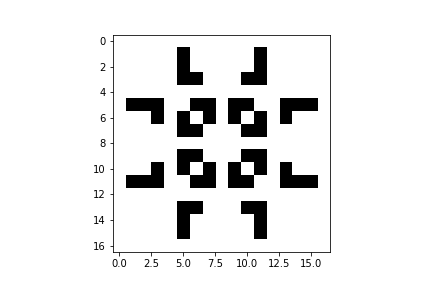
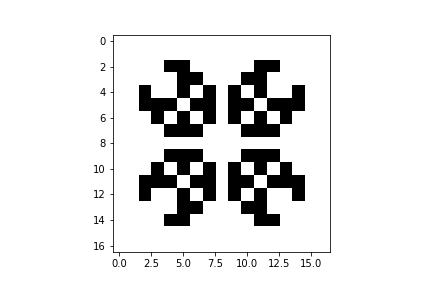
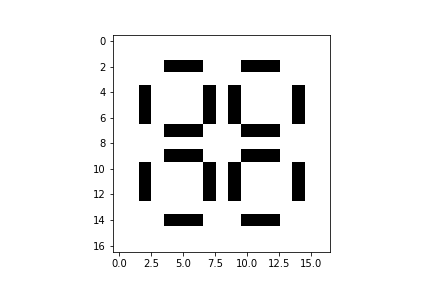
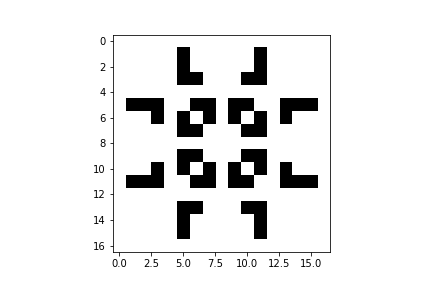
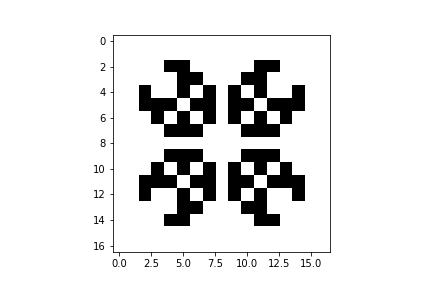
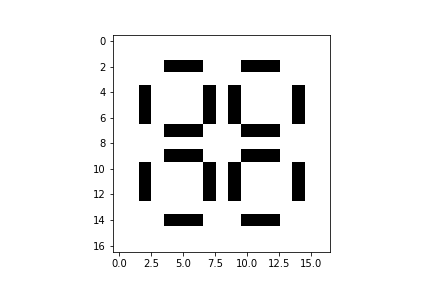
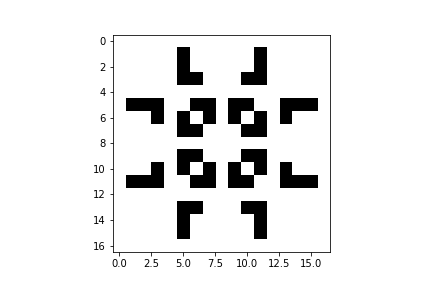
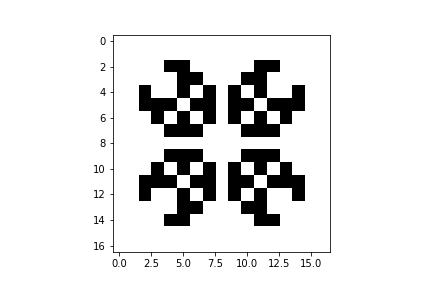
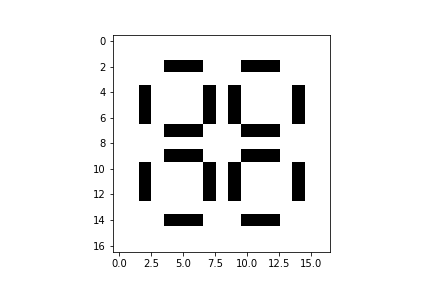
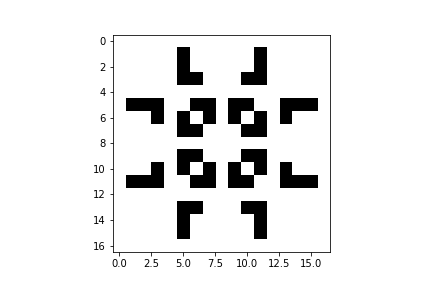
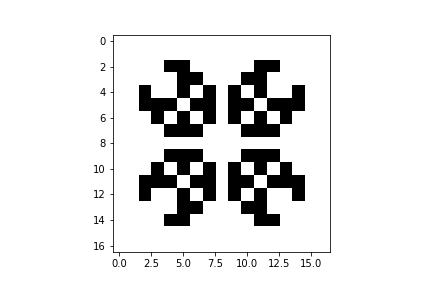
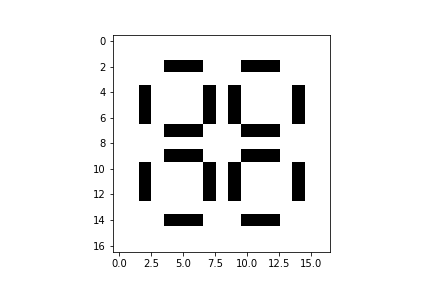
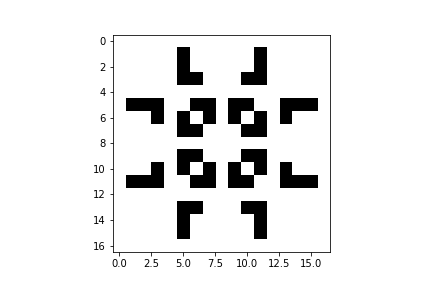
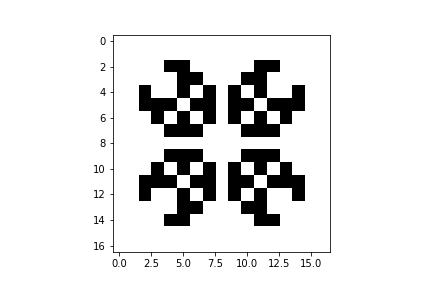
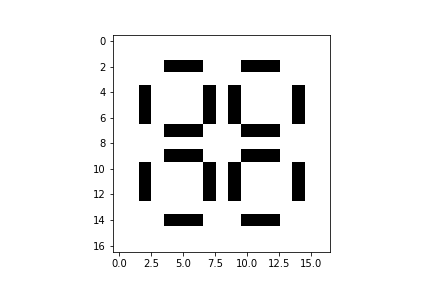
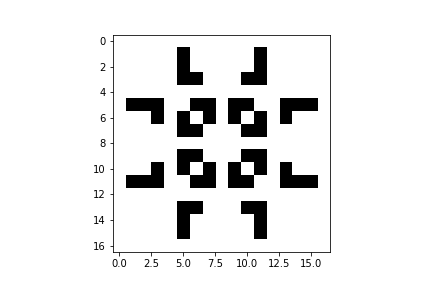
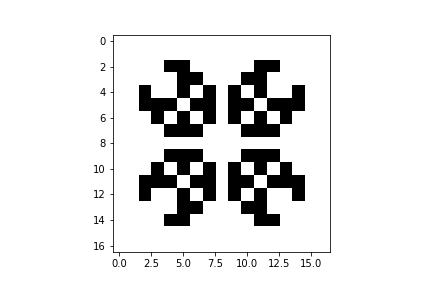
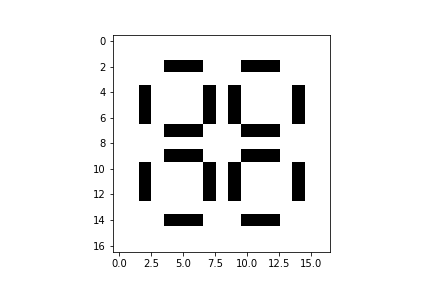
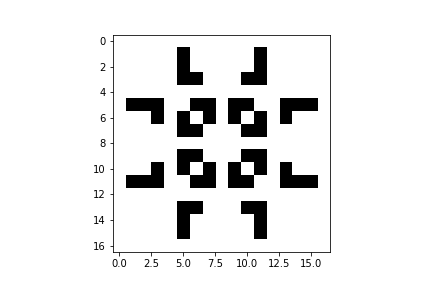
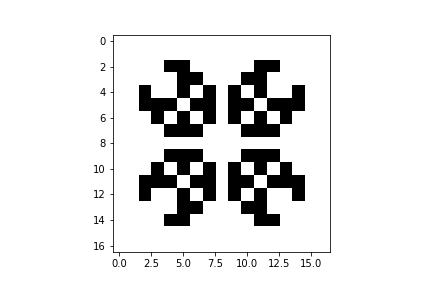
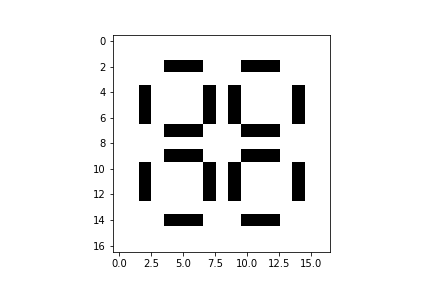
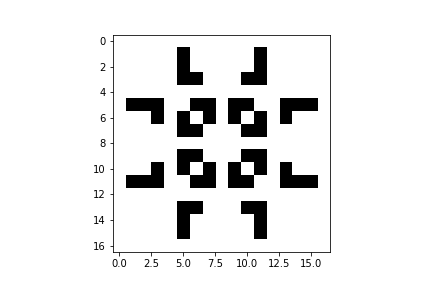
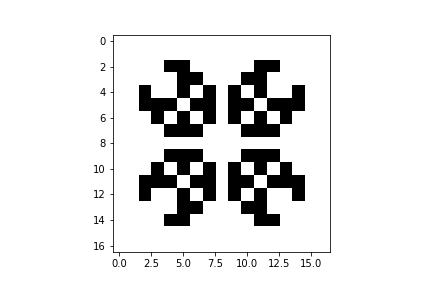
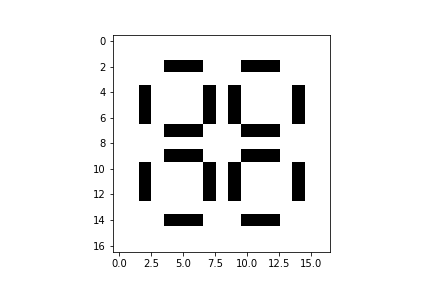
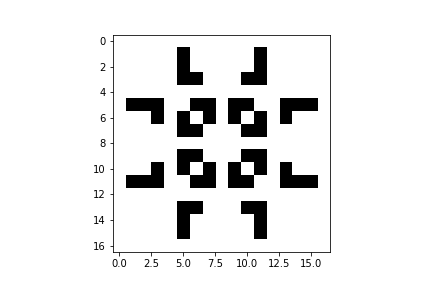
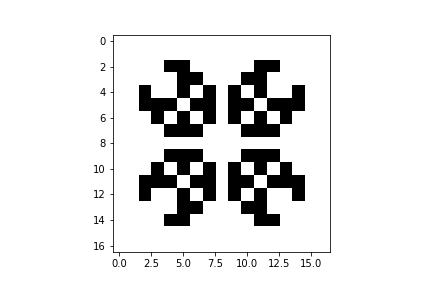
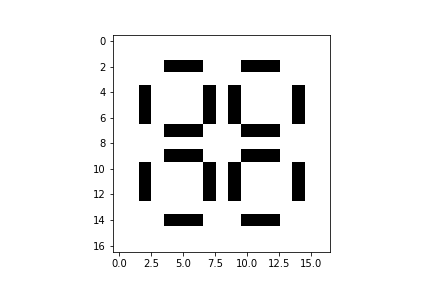
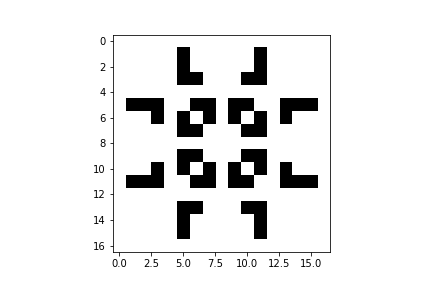
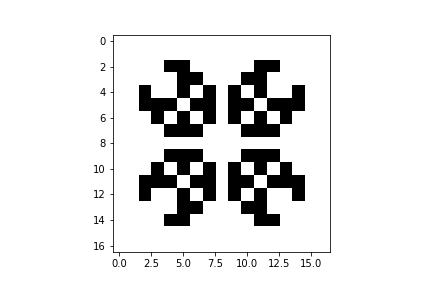
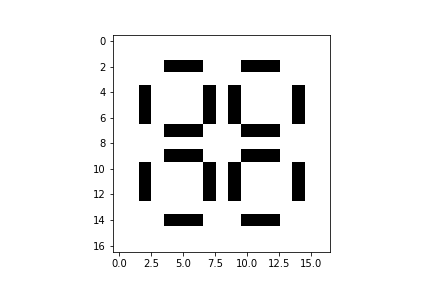
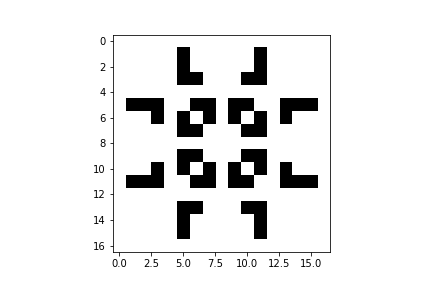
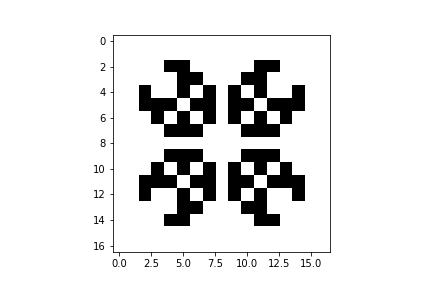
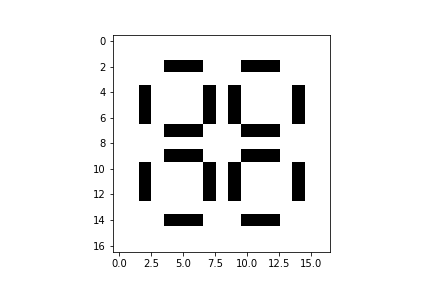
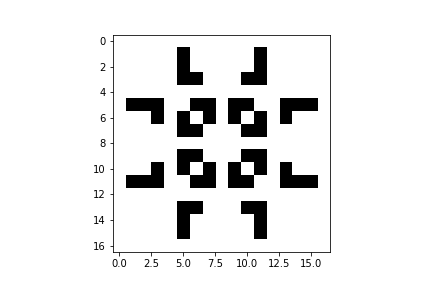
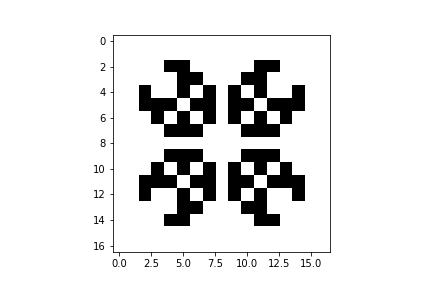
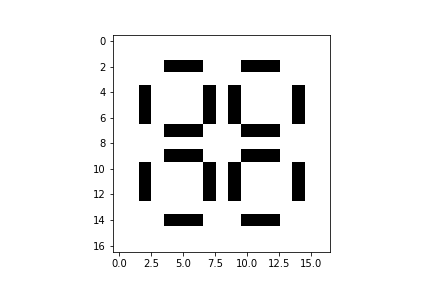
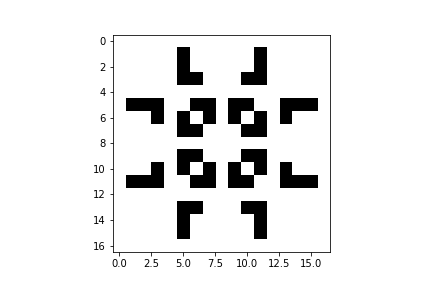
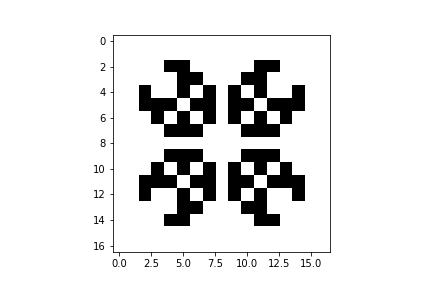
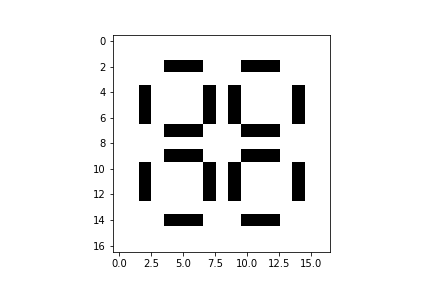
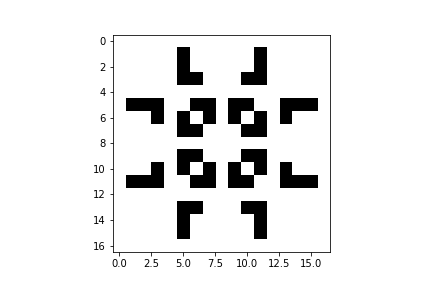
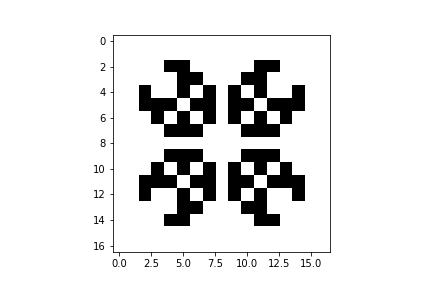
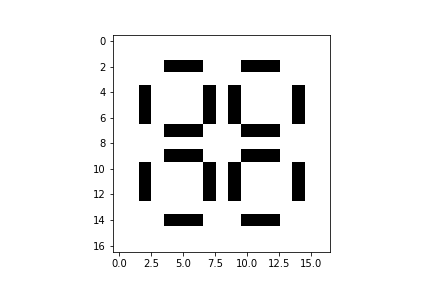
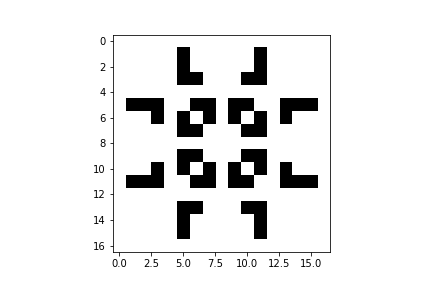
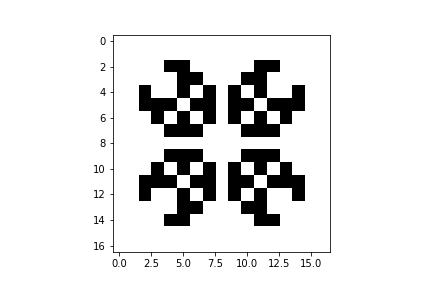
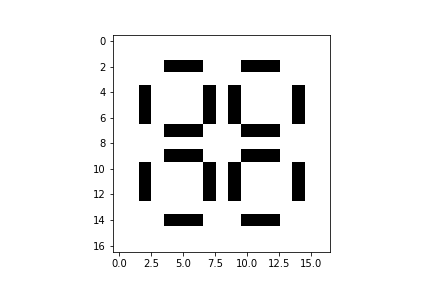
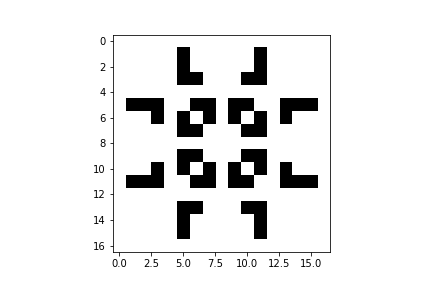
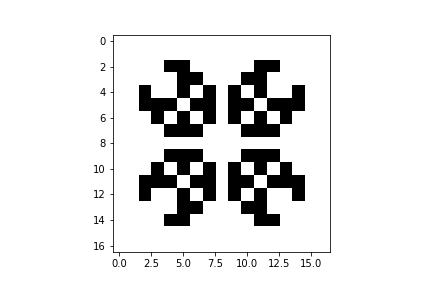
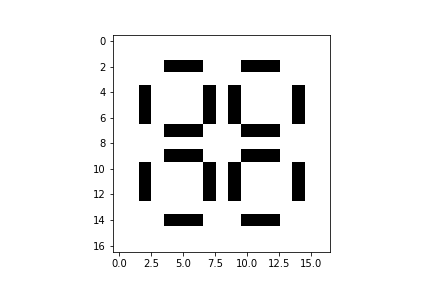
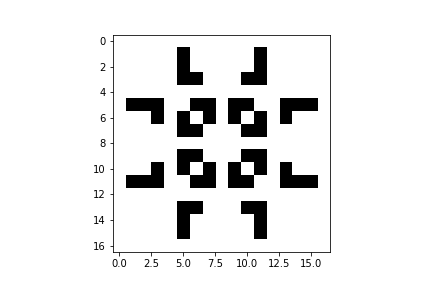
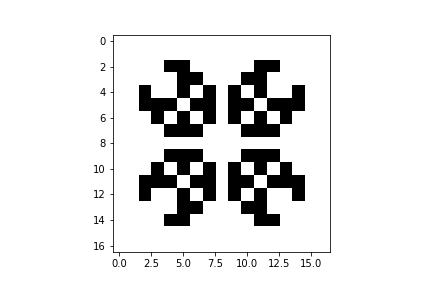
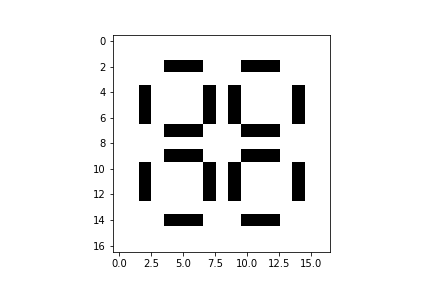
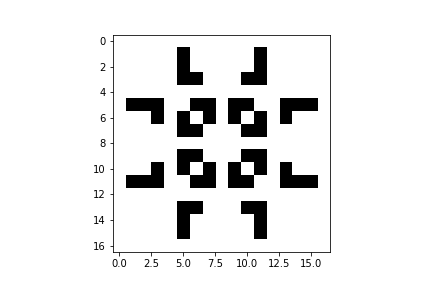
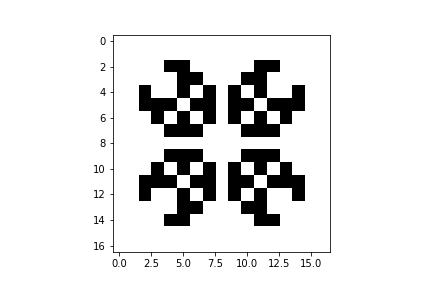
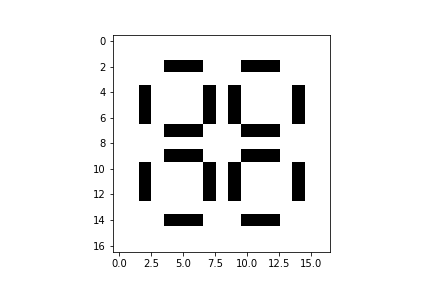
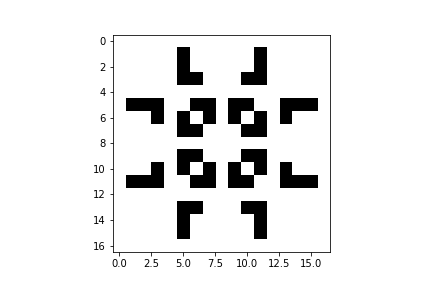
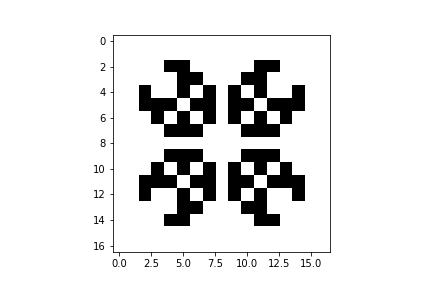
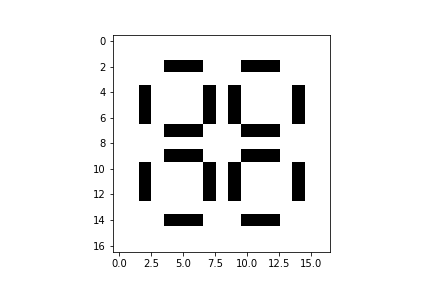
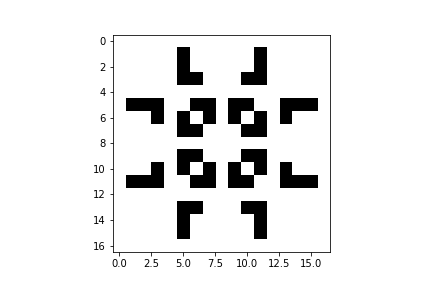
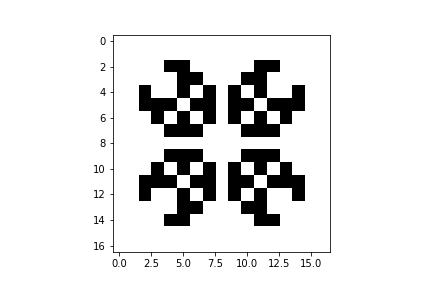
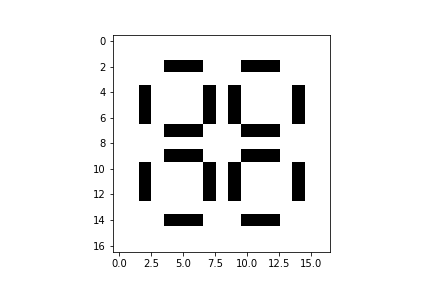
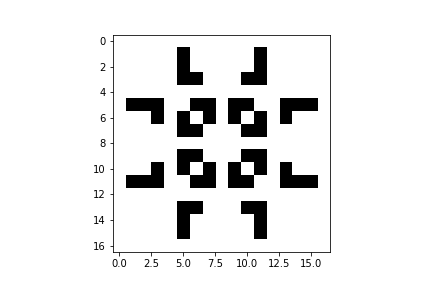
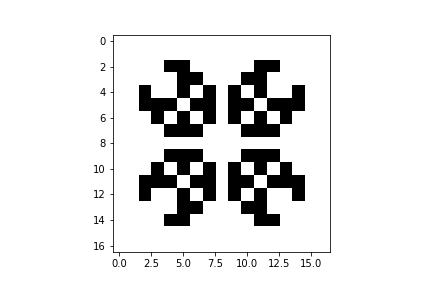
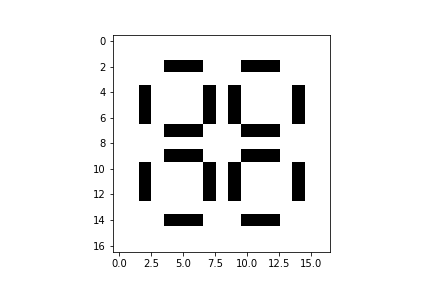
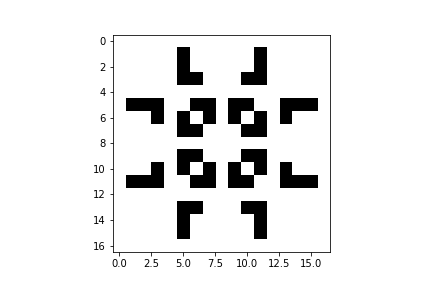
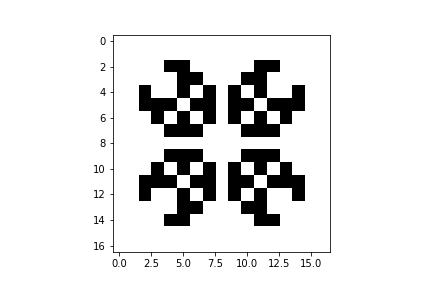
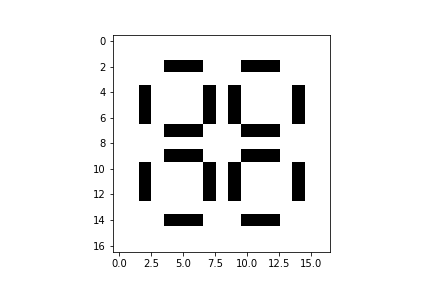
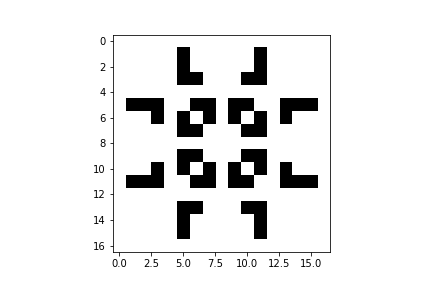
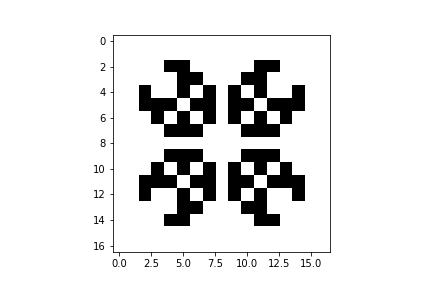
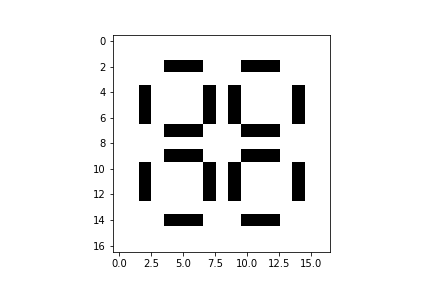
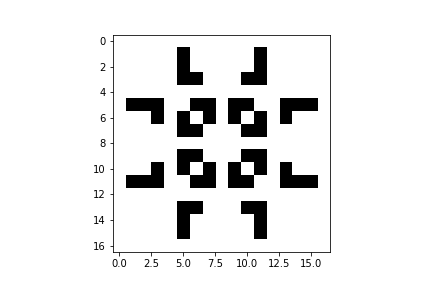
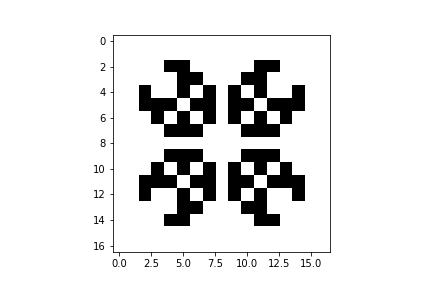
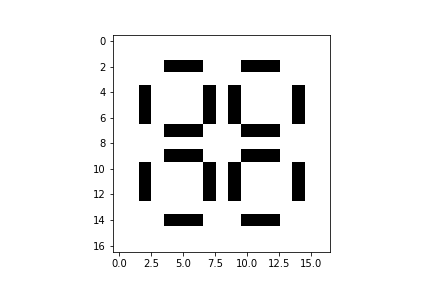
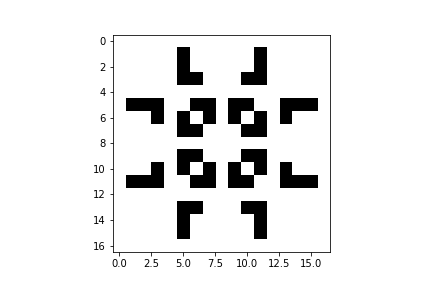
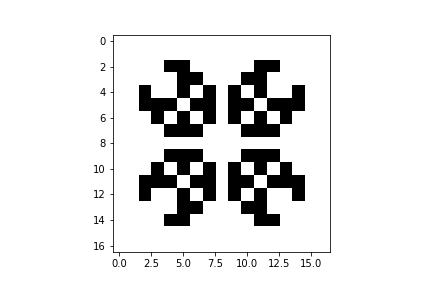
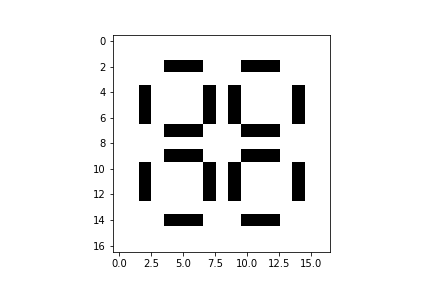
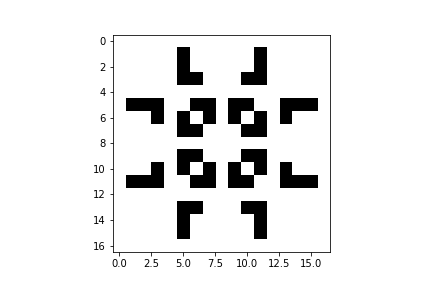
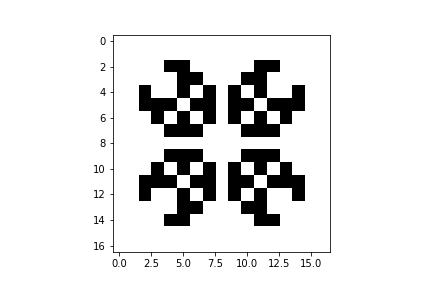
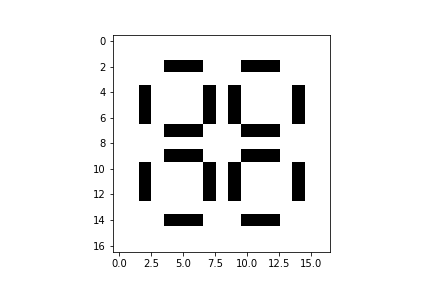
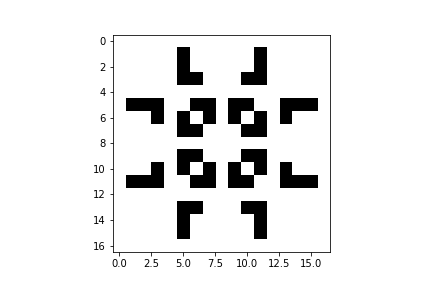
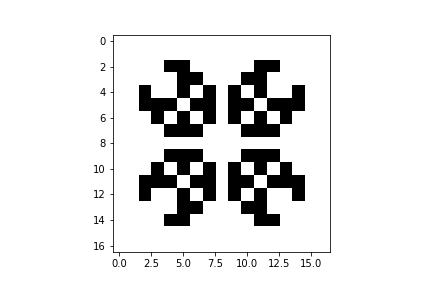
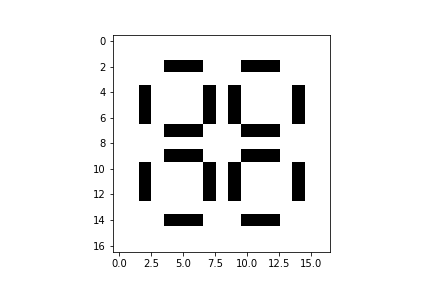
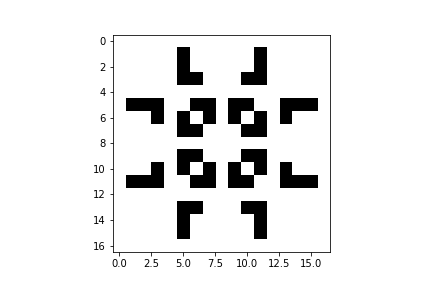
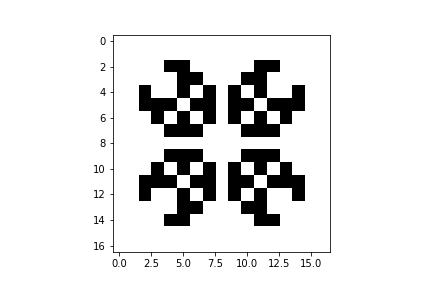
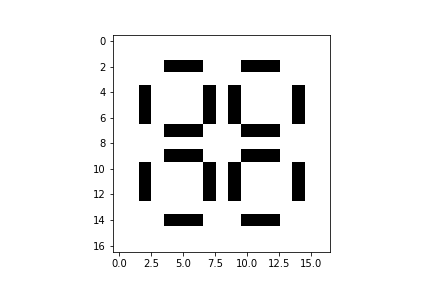
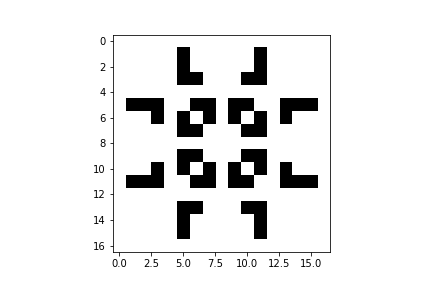
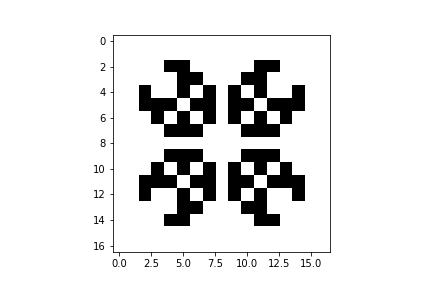
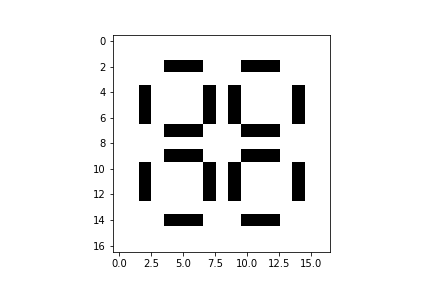
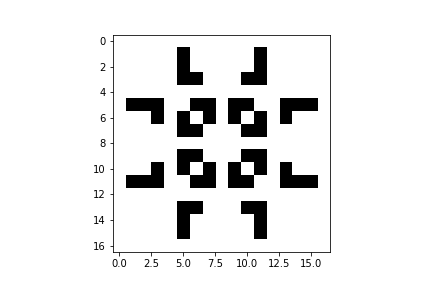
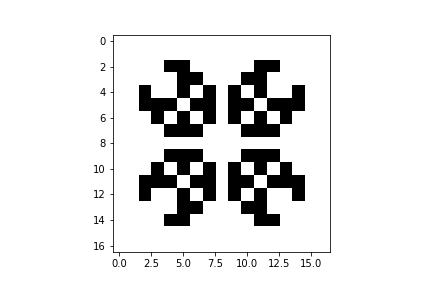
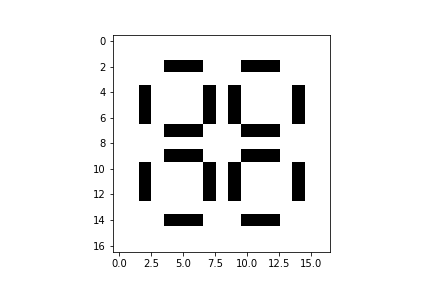
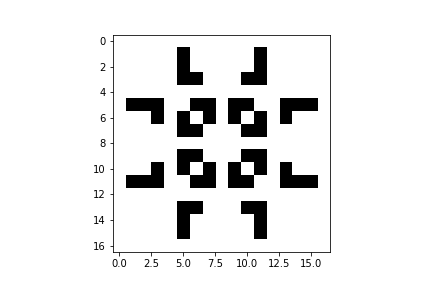
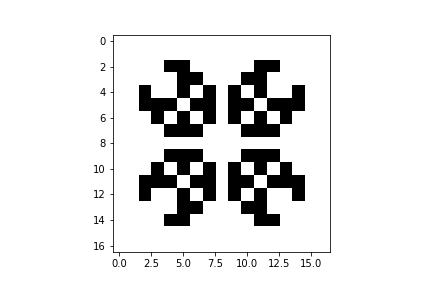
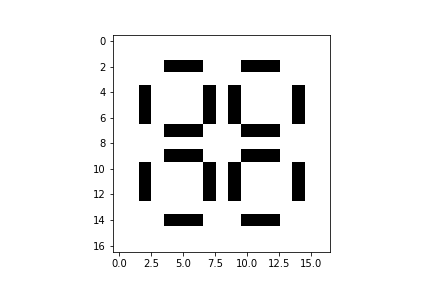
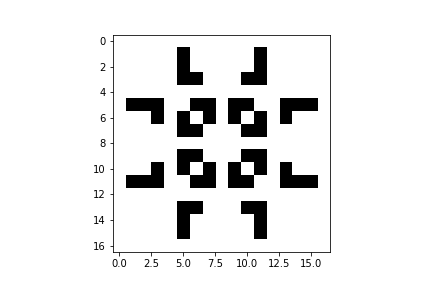

In [35]:
a = np.loadtxt('flower.txt', delimiter = ",")
step_animation(a, dpi=5)


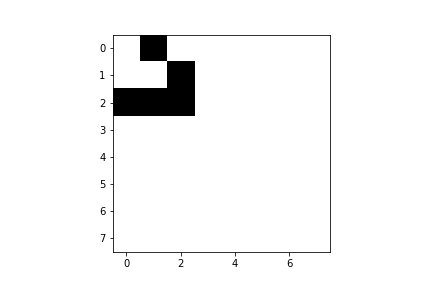
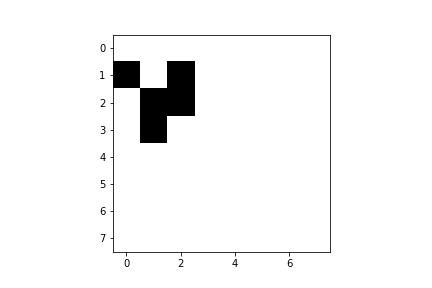
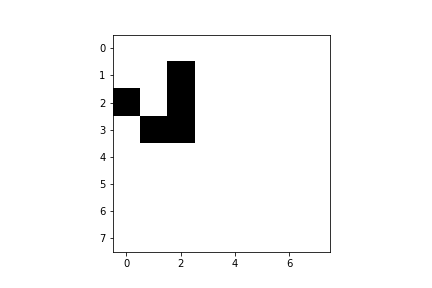
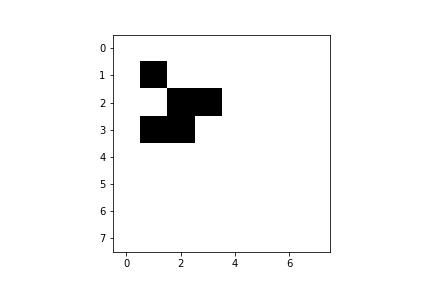
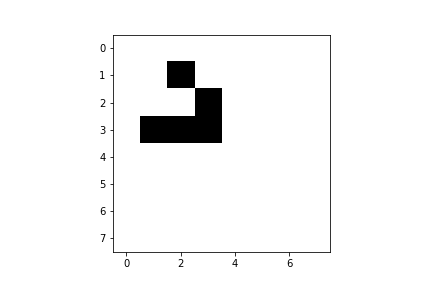
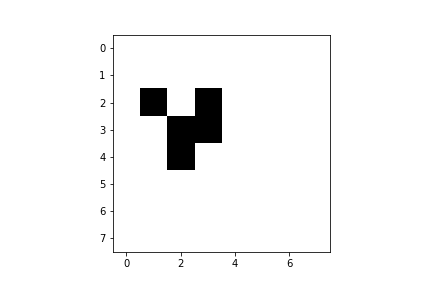
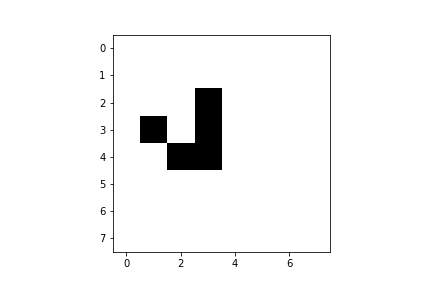
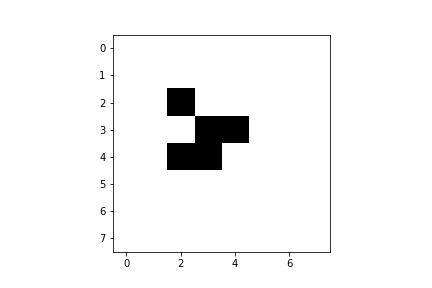
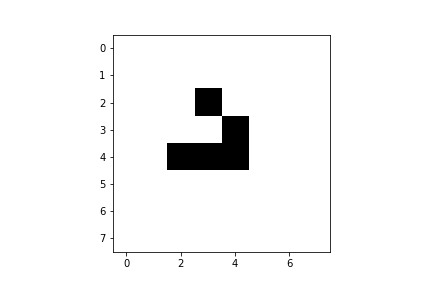
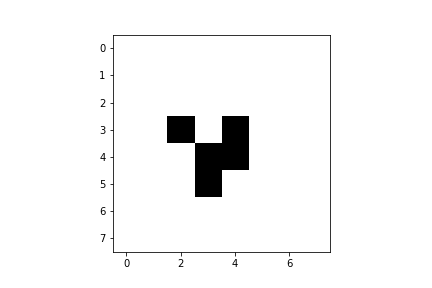
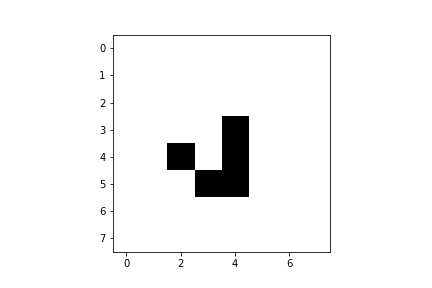
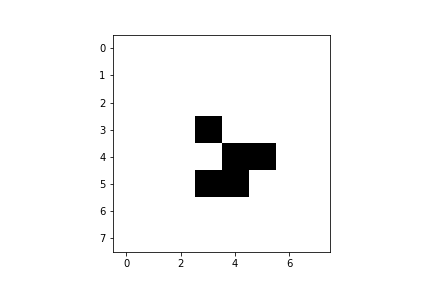
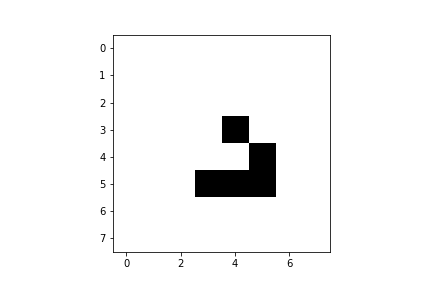
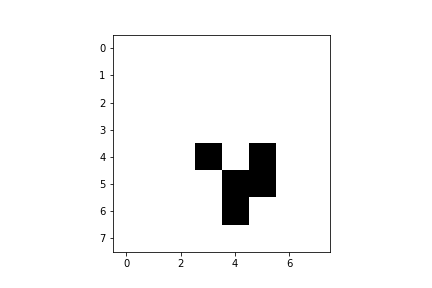
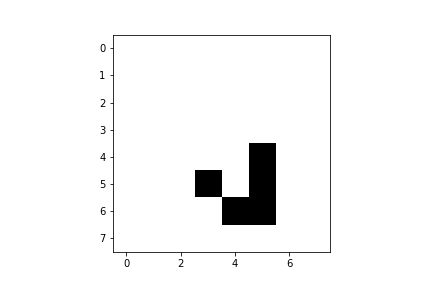
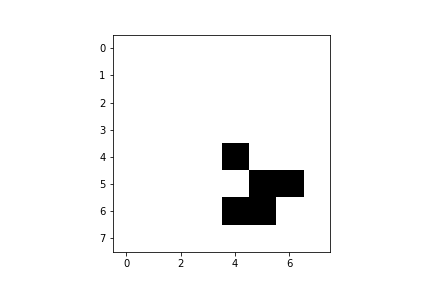
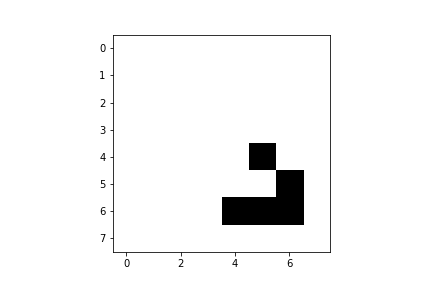
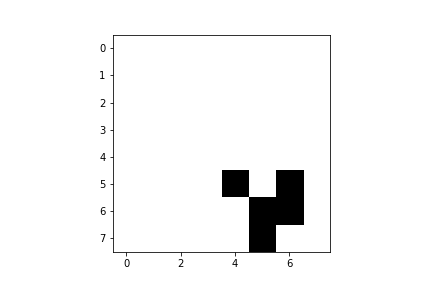
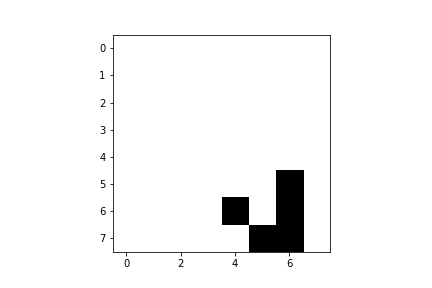
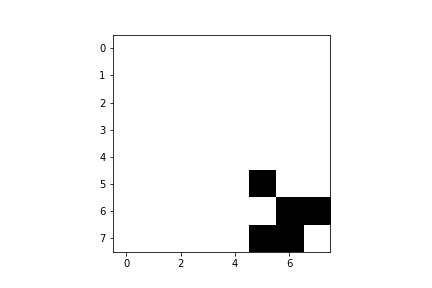
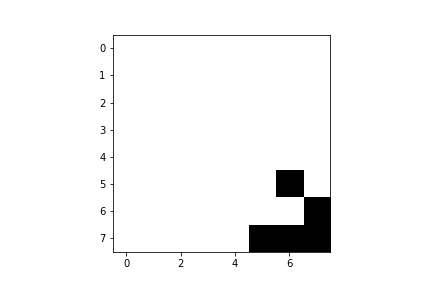
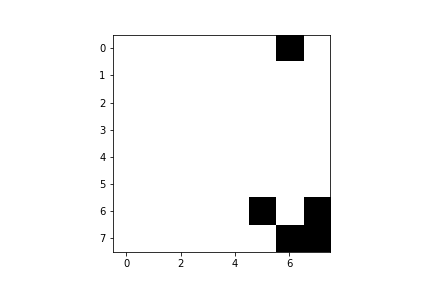
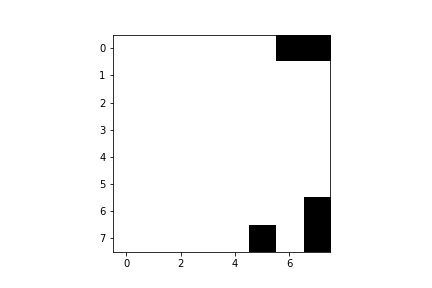
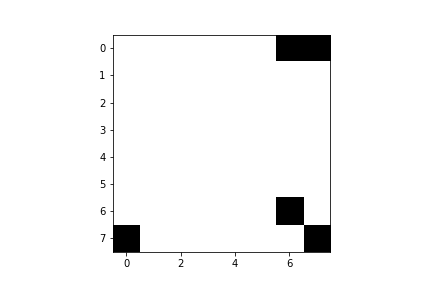
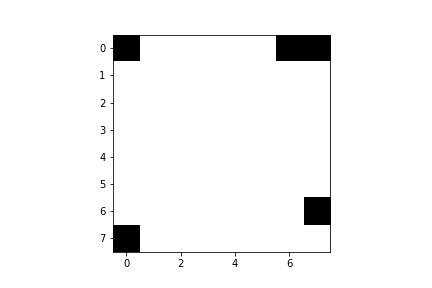
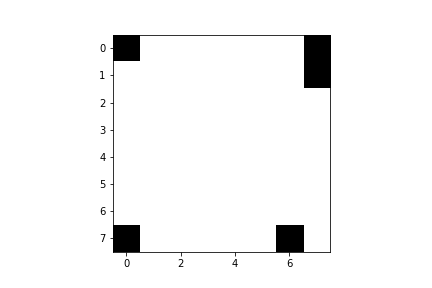
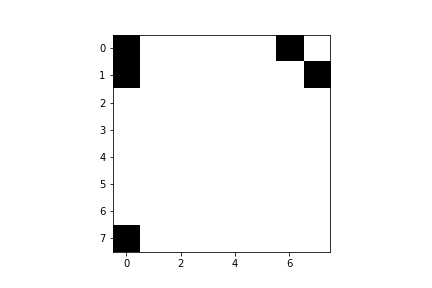
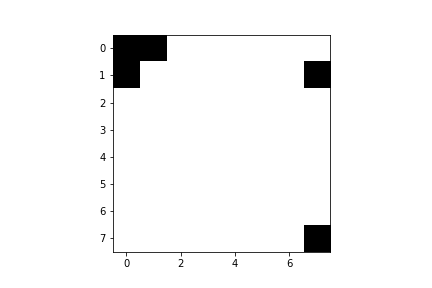
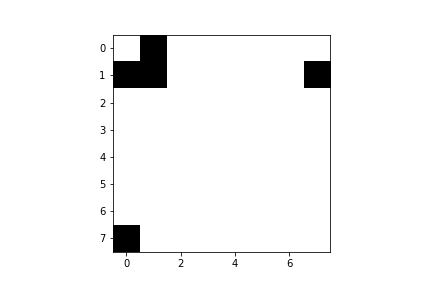
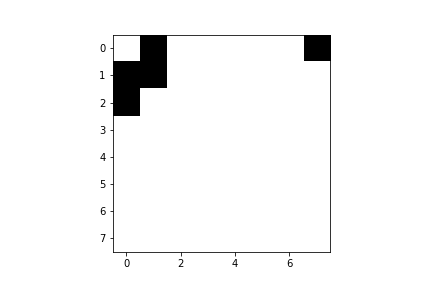
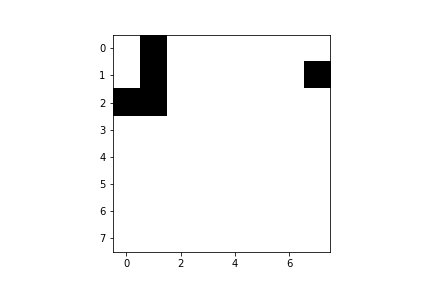
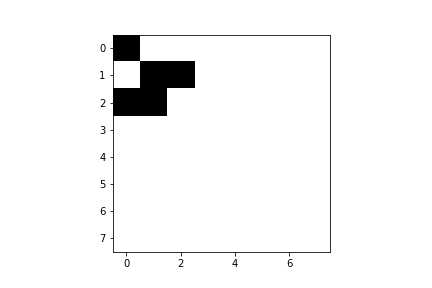
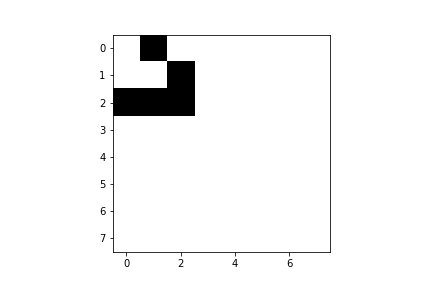
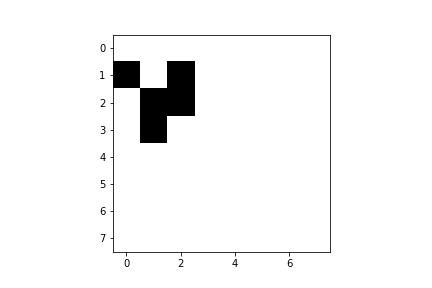
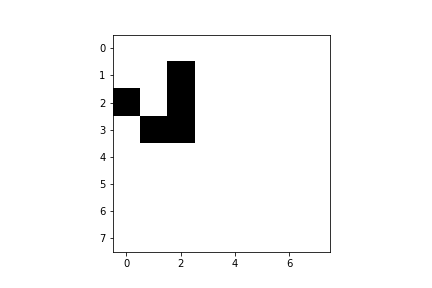
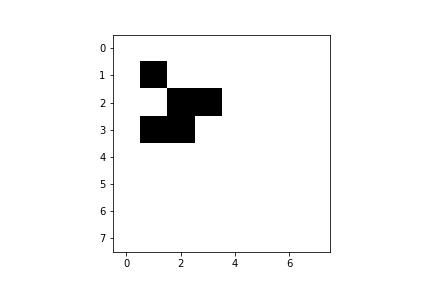
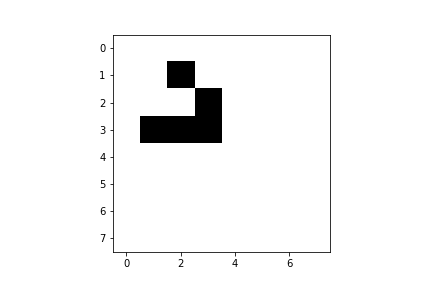
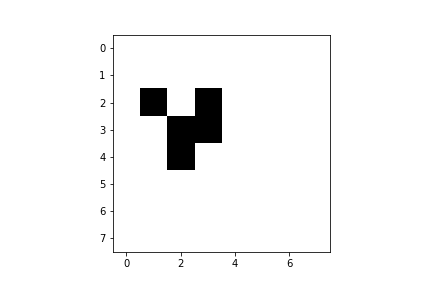
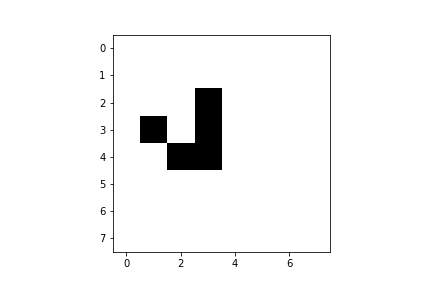
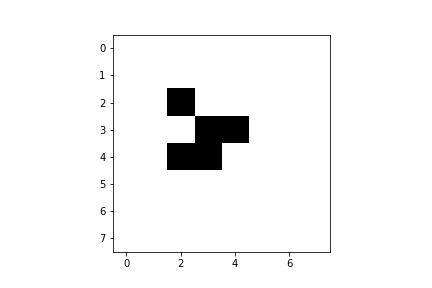
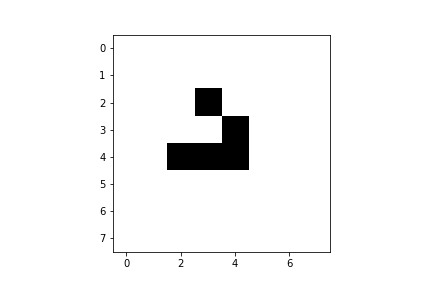
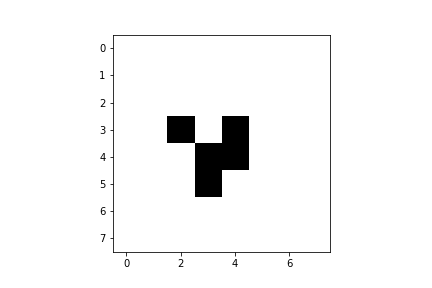
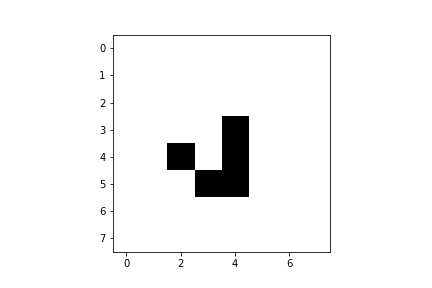
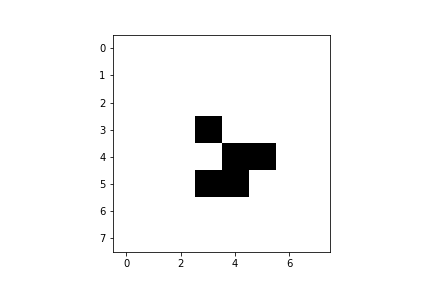
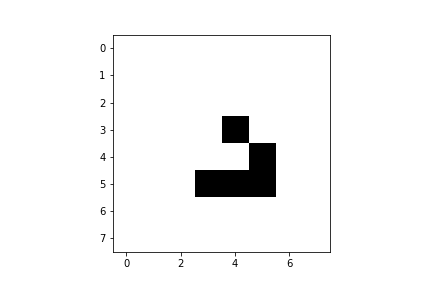
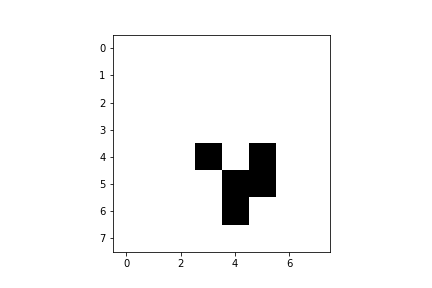
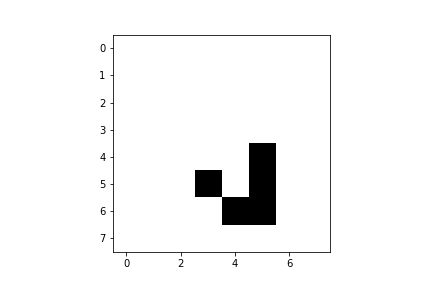
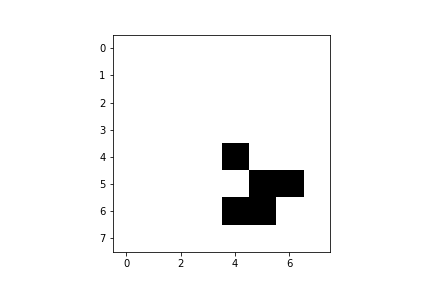
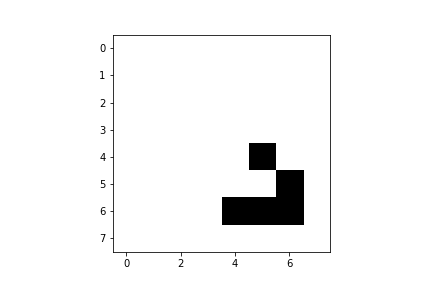
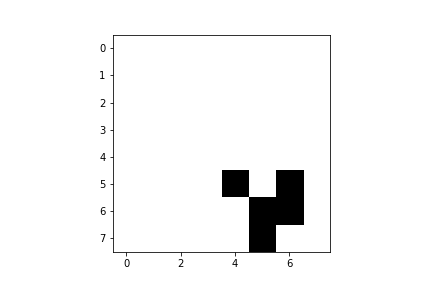
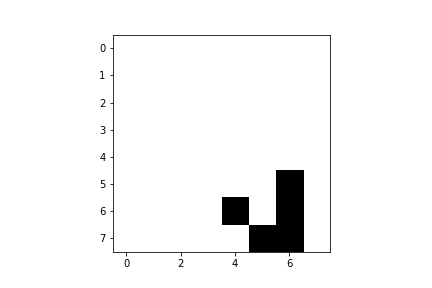
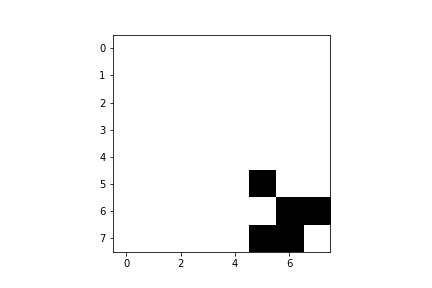
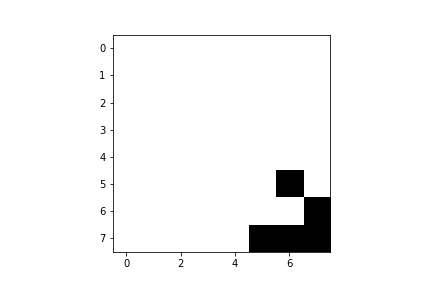
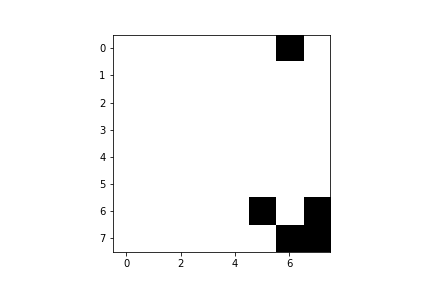
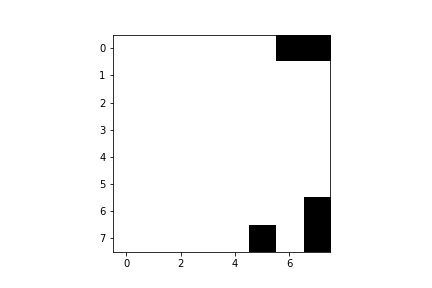
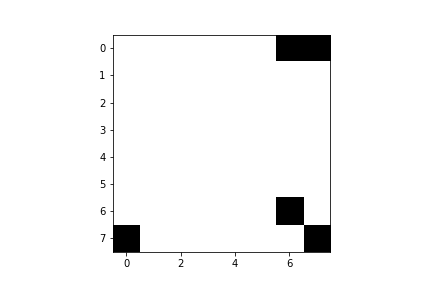
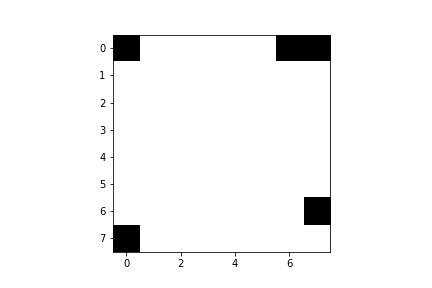
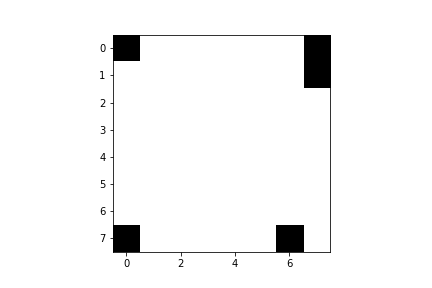
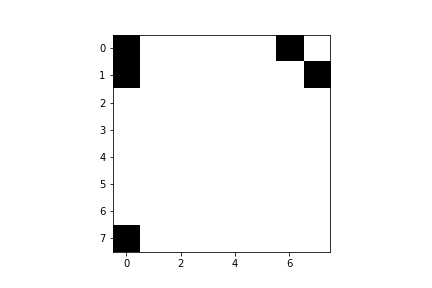
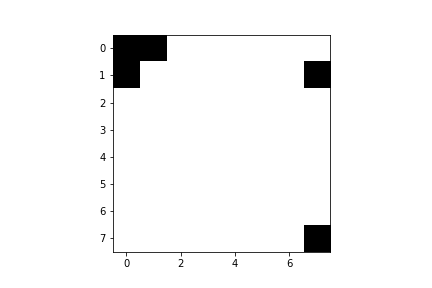
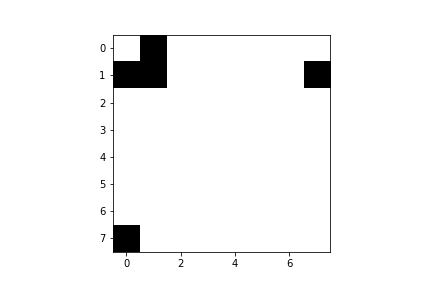
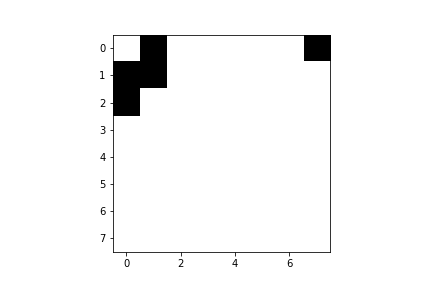
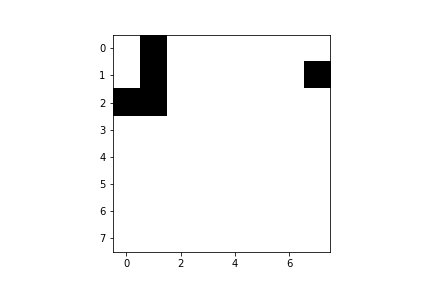
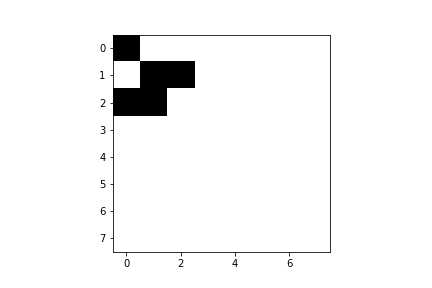
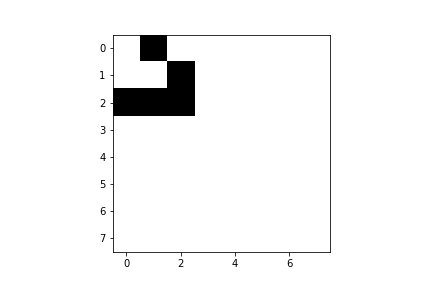
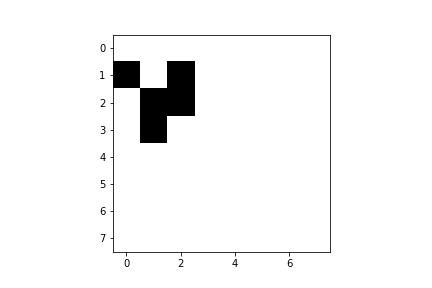
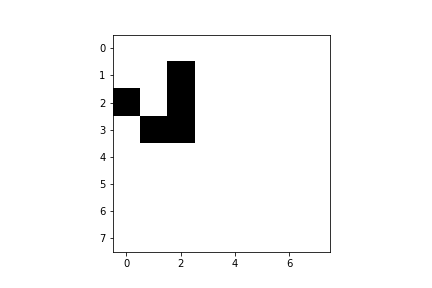
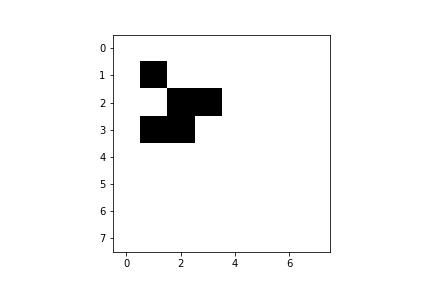
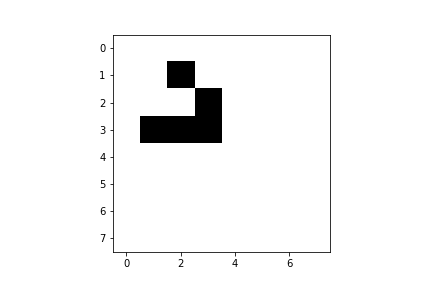
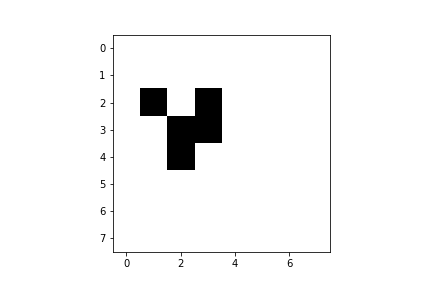
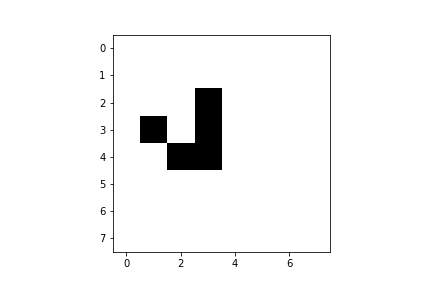
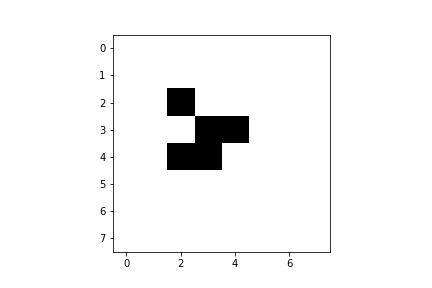
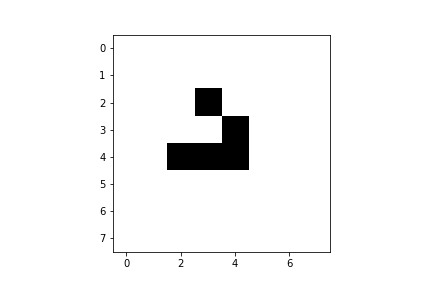
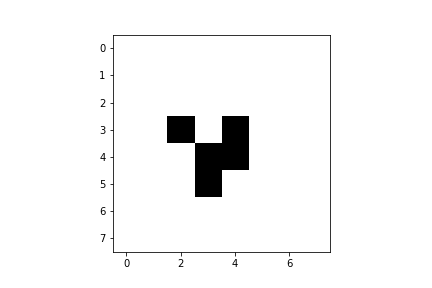
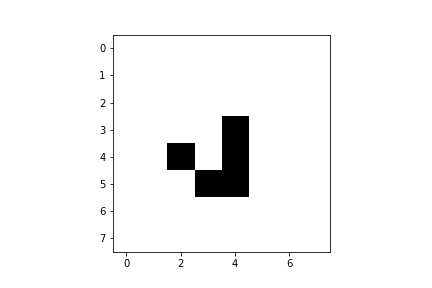
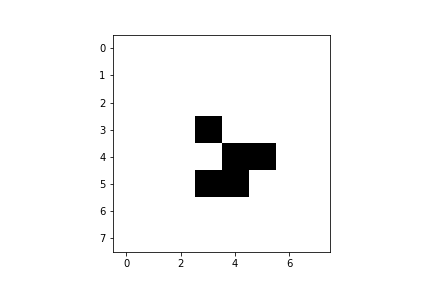
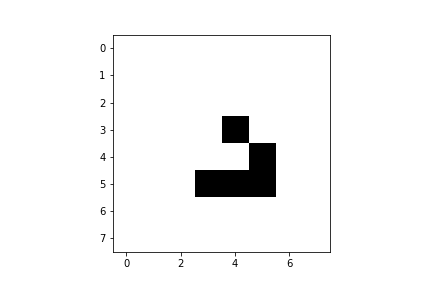
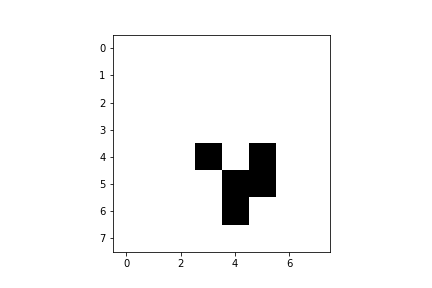
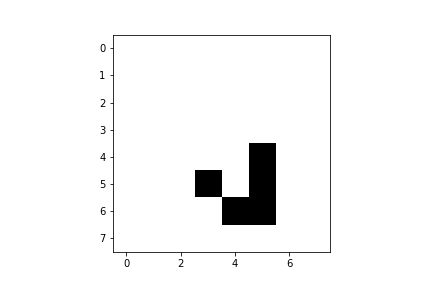
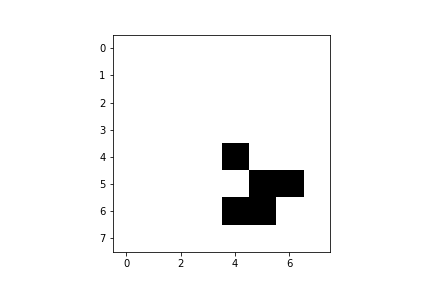
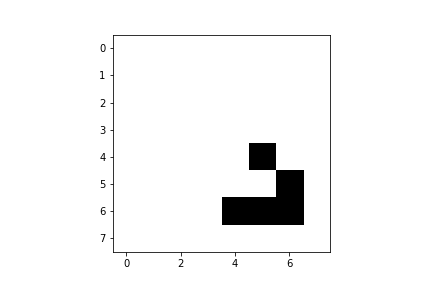
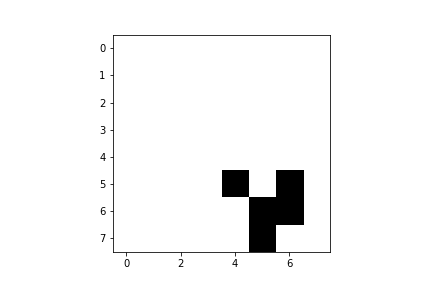
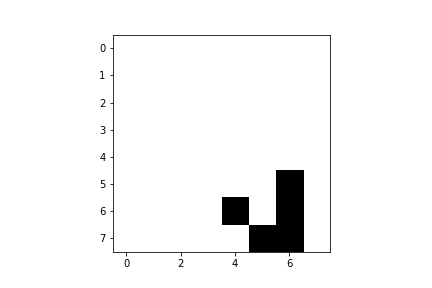
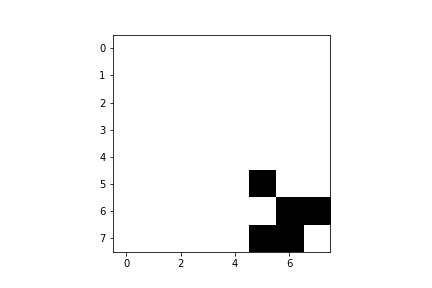
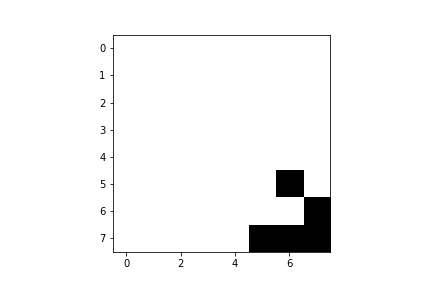
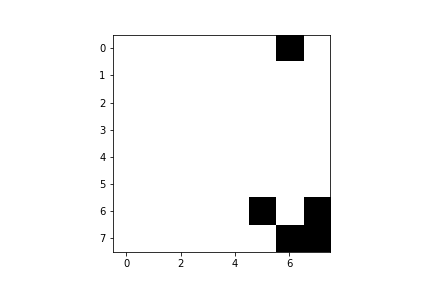
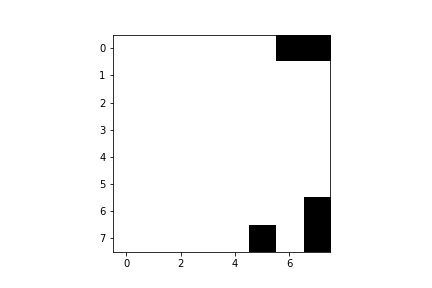
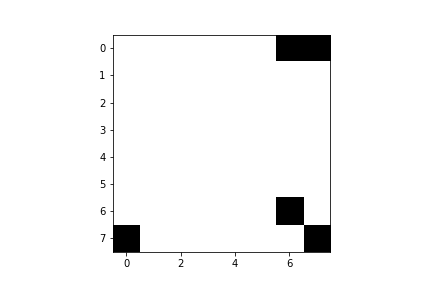
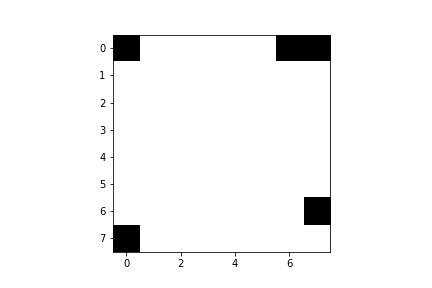
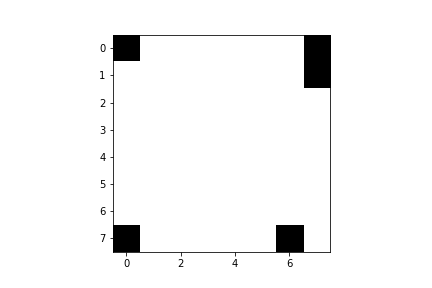
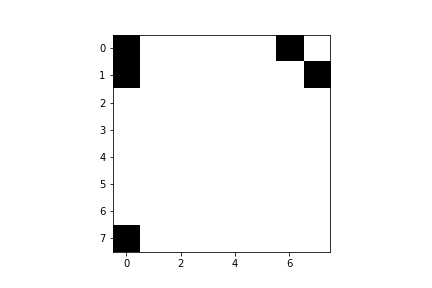
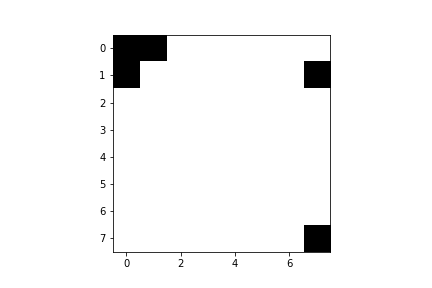
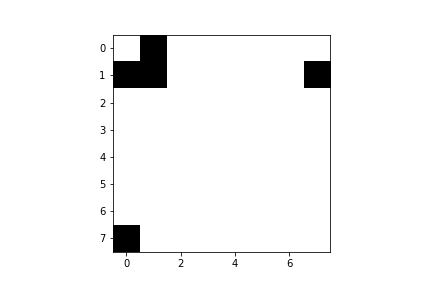
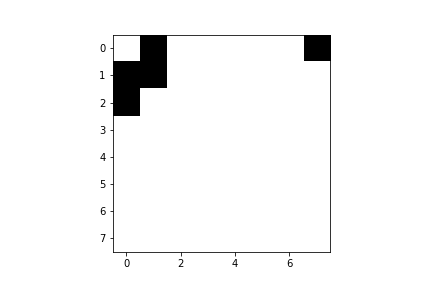
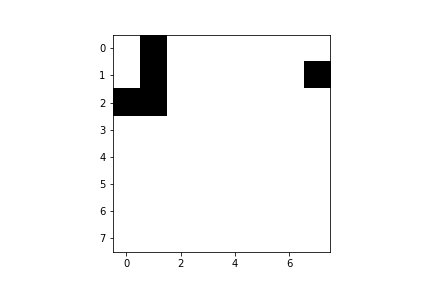
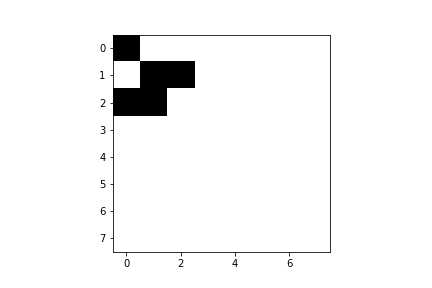
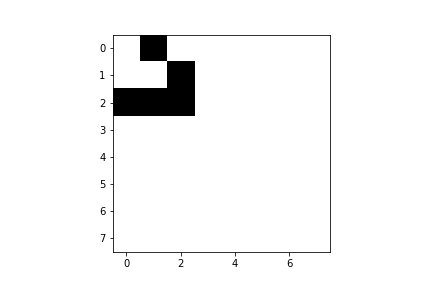
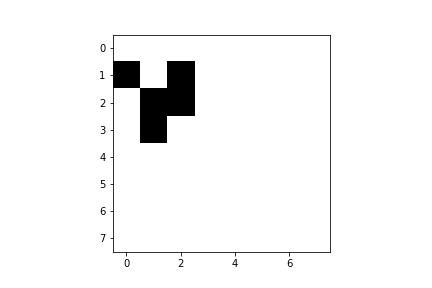
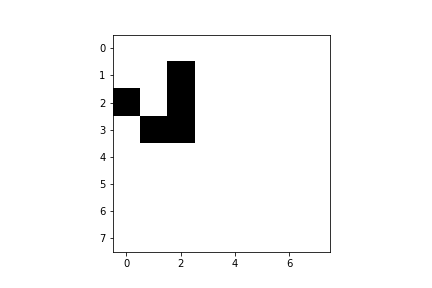
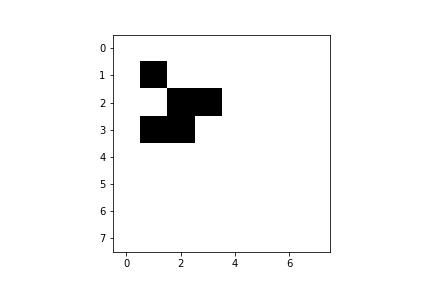

In [36]:
walk = np.loadtxt("walk.txt")
step_animation(walk, dpi=10)